In [11]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image

rcParams['font.family'] = 'Arial'


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

In [28]:
df = pd.read_csv('Tennessee 500 Cities.csv')
df.head()

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
0  Chattanooga              4714000  17.9  14.3      25.4   
1  Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2  Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3  Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4  Chattanooga  4714000-47065000800   7.4   5.4      10.2   

   High Blood Pressure  High Cholesterol  Cholesterol Screening  \
0                 79.1              70.9                  153.0   
1                 57.6              43.3                   72.9   
2                 29.8              33.2                   81.6   
3                 25.6              29.9                   78.2   
4                 33.2              33.0                   74.3   

   Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
0                      32.9                                    147.0   
1                      26.3                                     84.3   
2                       8.4                                     76.9   
3                       8.6                                     73.4   
4                      14.9                                     75.4   

   Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
0          144.7            25.9     47.4             58.6     68.1   
1           78.9             8.0     32.6             46.3     48.0   
2           69.6            16.6     15.7             17.7     25.3   
3           68.0            17.6     15.7             16.8     24.3   
4           68.7            15.3     24.1             25.9     32.3   

   Sleeping less than 7 hours  
0                        80.0  
1                        50.0  
2                        32.8  
3                        32.8  
4                        39.4

In [13]:
df

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
0    Chattanooga              4714000  17.9  14.3      25.4   
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
0                   79.1              70.9                  153.0   
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
0                        32.9                                    147.0   
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
0            144.7            25.9     47.4             58.6     68.1   
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
0                          80.0  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[543 rows x 16 columns]

# CHD & Binge Drinking

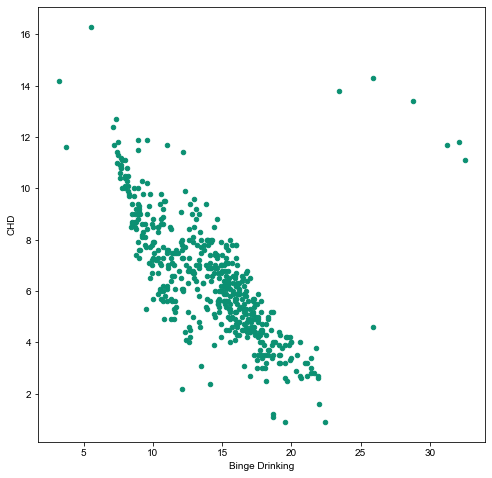

In [14]:
df.plot(kind='scatter', y='CHD', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

In [70]:
Q1_CHD = df['CHD'].quantile(0.25)
Q3_CHD = df['CHD'].quantile(0.75)
IQR_CHD = Q3_CHD - Q1_CHD
Q1_Binge_Drinking = df['Binge Drinking'].quantile(0.25)
Q3_Binge_Drinking = df['Binge Drinking'].quantile(0.75)
IQR_Binge_Drinking = Q3_Binge_Drinking - Q1_Binge_Drinking
df1 = df[(df['CHD'] > Q1_CHD-1.5*IQR_CHD) & 
            (df['CHD'] < Q3_CHD+1.5*IQR_CHD)]
df1 = df1[(df1['Binge Drinking']>Q1_Binge_Drinking-1.5*IQR_Binge_Drinking) & 
                (df1['Binge Drinking']<Q3_Binge_Drinking+1.5*IQR_Binge_Drinking)]
df1

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[506 rows x 16 columns]

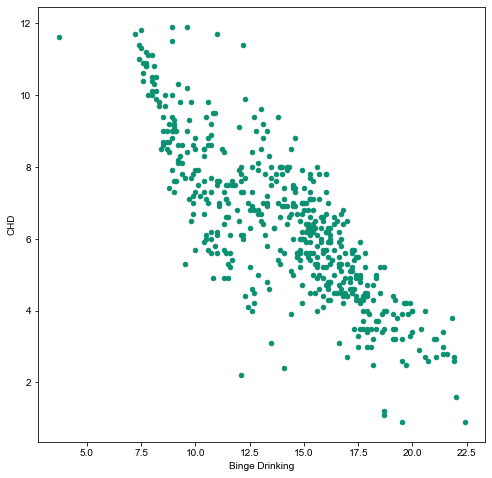

In [71]:
df1.plot(kind='scatter', y='CHD', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

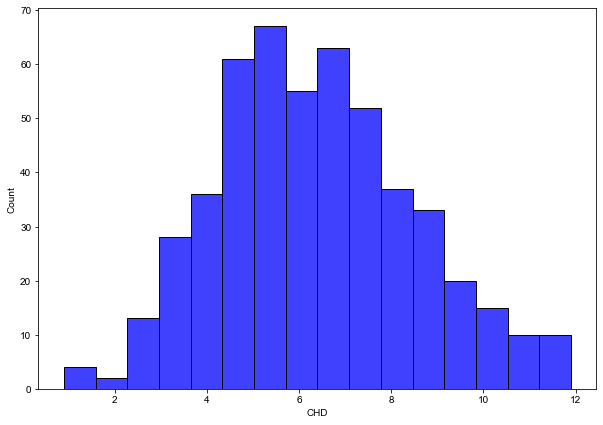

In [72]:
plt.figure(figsize=(10,7))
sns.histplot(df1['CHD'], color='blue');

In [74]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df1['Binge Drinking'], df1['CHD'])

In [75]:
regressors = ['Binge Drinking']

model = sm.OLS(df1['CHD'], sm.add_constant(df1[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CHD   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1019.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          3.82e-123
Time:                        16:58:33   Log-Likelihood:                -819.81
No. Observations:                 506   AIC:                             1644.
Df Residuals:                     504   BIC:                             1652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.3560      0.225     59.292      0.000      12.913      13.799
Binge Drinking    -0.4947      0.015    -31.928      0.000      -0.525      -0.464
==============================================================================
Omnibus:                       20.246   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.721
Skew:                          -0.341   Prob(JB):                     5.80e-07
Kurtosis:                       3.947   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

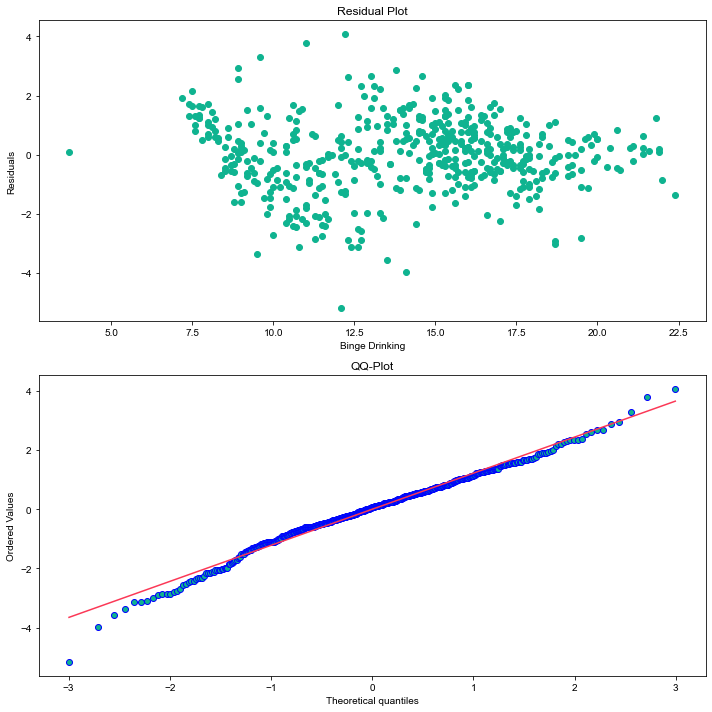

In [76]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df1['CHD'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df1['Binge Drinking'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Binge Drinking')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

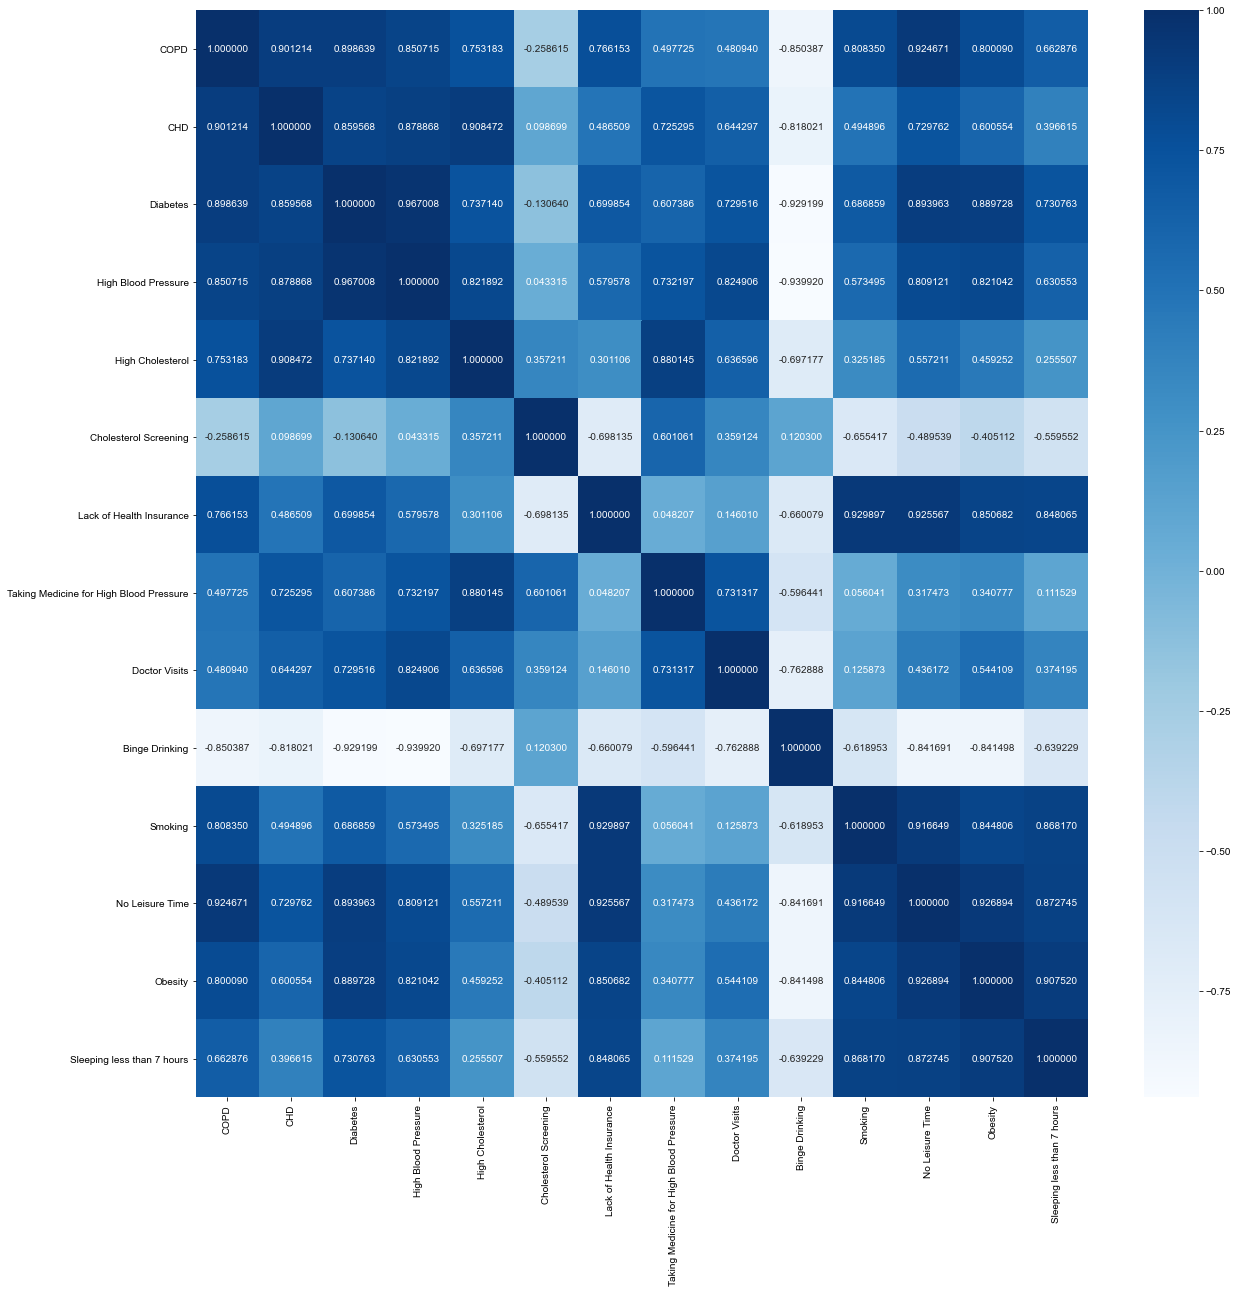

In [77]:
corr_matrix = df1[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# COPD & Lack of Health Insurance

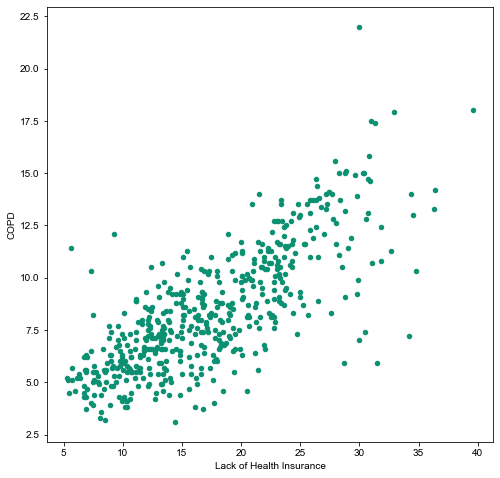

In [78]:
df.plot(kind='scatter', y='COPD', x='Lack of Health Insurance', figsize=(8,8), color="#0b9072")
plt.show()

In [79]:
Q1_COPD = df['COPD'].quantile(0.25)
Q3_COPD = df['COPD'].quantile(0.75)
IQR_COPD = Q3_COPD - Q1_COPD
Q1_Insurance = df['Lack of Health Insurance'].quantile(0.25)
Q3_Insurance = df['Lack of Health Insurance'].quantile(0.75)
IQR_Insurance = Q3_Insurance - Q1_Insurance
df2 = df[(df['COPD'] > Q1_COPD-1.5*IQR_COPD) & 
            (df['COPD'] < Q3_COPD+1.5*IQR_COPD)]
df2 = df2[(df2['Lack of Health Insurance']>Q1_Insurance-1.5*IQR_Insurance) & 
                (df1['Lack of Health Insurance']<Q3_Insurance+1.5*IQR_Insurance)]
df2

<ipython-input-79-a9f29e46e402>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2['Lack of Health Insurance']>Q1_Insurance-1.5*IQR_Insurance) &


CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[505 rows x 16 columns]

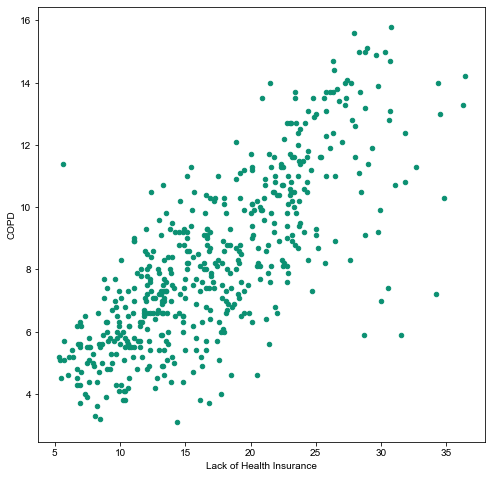

In [80]:
df2.plot(kind='scatter', y='COPD', x='Lack of Health Insurance', figsize=(8,8), color="#0b9072")
plt.show()

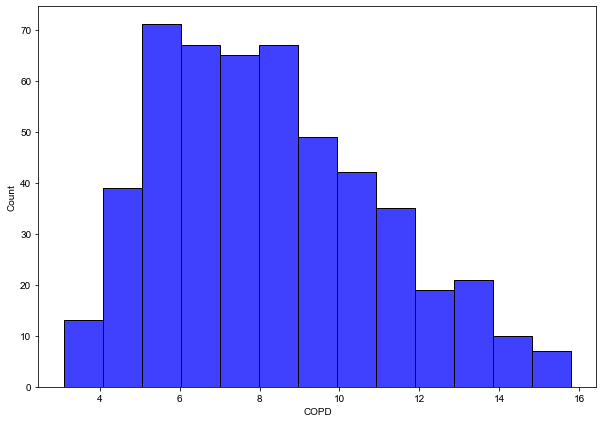

In [81]:
plt.figure(figsize=(10,7))
sns.histplot(df2['COPD'], color='blue');

In [82]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df2['Lack of Health Insurance'], df2['COPD'])

In [83]:
regressors = ['Lack of Health Insurance']

model = sm.OLS(df2['COPD'], sm.add_constant(df2[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   COPD   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     705.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           9.16e-98
Time:                        17:06:20   Log-Likelihood:                -1001.7
No. Observations:                 505   AIC:                             2007.
Df Residuals:                     503   BIC:                             2016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8696      0.218     13.178      0.000       2.442       3.297
Lack of Health Insurance     0.3140      0.012     26.554      0.000       0.291       0.337
==============================================================================
Omnibus:                       17.011   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.050
Skew:                          -0.294   Prob(JB):                     5.99e-06
Kurtosis:                       3.893   Cond. No.                         51.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

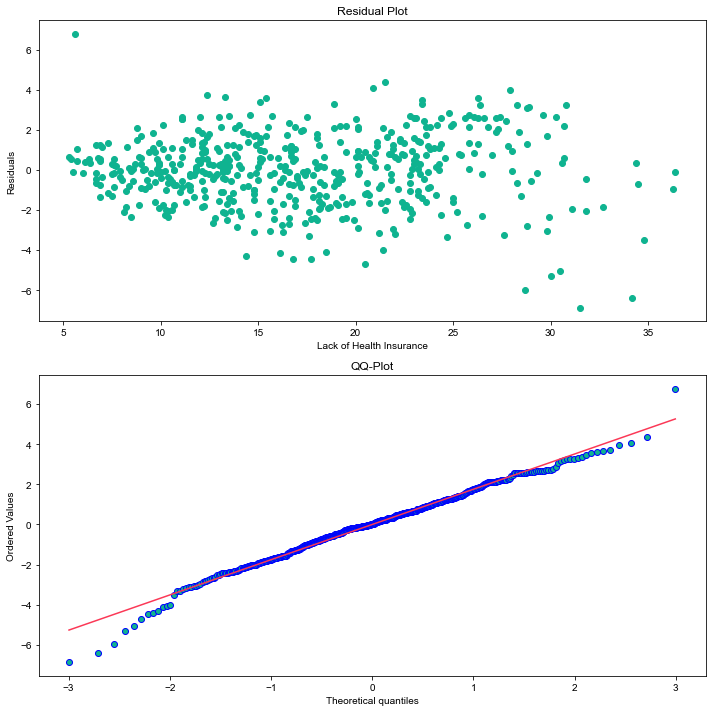

In [84]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df2['COPD'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df2['Lack of Health Insurance'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Lack of Health Insurance')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

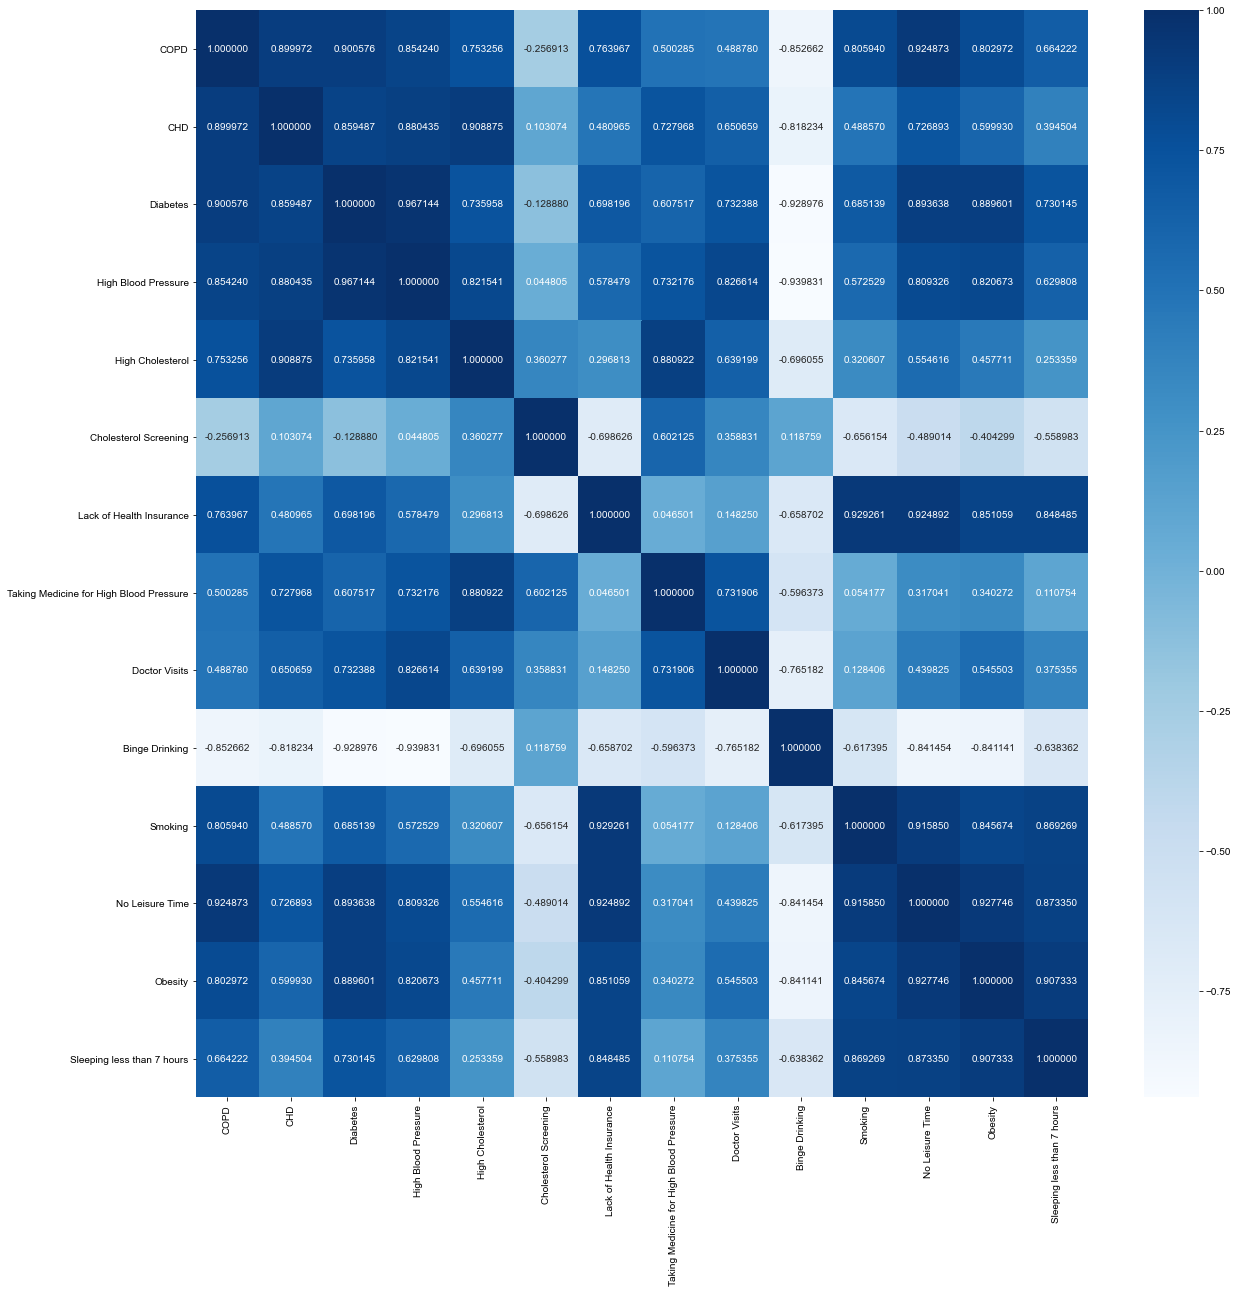

In [85]:
corr_matrix = df2[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# COPD & Smoking

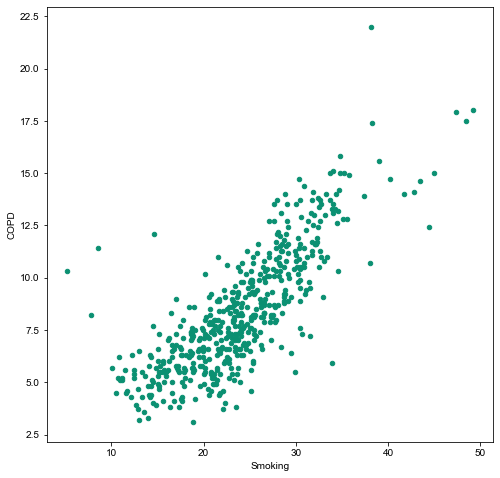

In [86]:
df.plot(kind='scatter', y='COPD', x='Smoking', figsize=(8,8), color="#0b9072")
plt.show()

In [104]:
Q1_COPD = df['COPD'].quantile(0.25)
Q3_COPD = df['COPD'].quantile(0.75)
IQR_COPD = Q3_COPD - Q1_COPD
Q1_Smoking = df['Smoking'].quantile(0.25)
Q3_Smoking = df['Smoking'].quantile(0.75)
IQR_Smoking = Q3_Smoking - Q1_Smoking
df3 = df[(df['COPD'] > Q1_COPD-1.5*IQR_COPD) & 
            (df['COPD'] < Q3_COPD+1.5*IQR_COPD)]
df3 = df3[(df3['Smoking']>Q1_Smoking-1.5*IQR_Smoking) & 
                (df3['Smoking']<Q3_Smoking+1.5*IQR_Smoking)]
df3

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[506 rows x 16 columns]

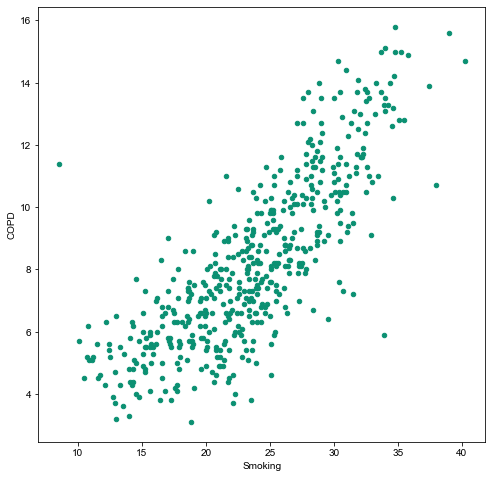

In [88]:
df3.plot(kind='scatter', y='COPD', x='Smoking', figsize=(8,8), color="#0b9072")
plt.show()

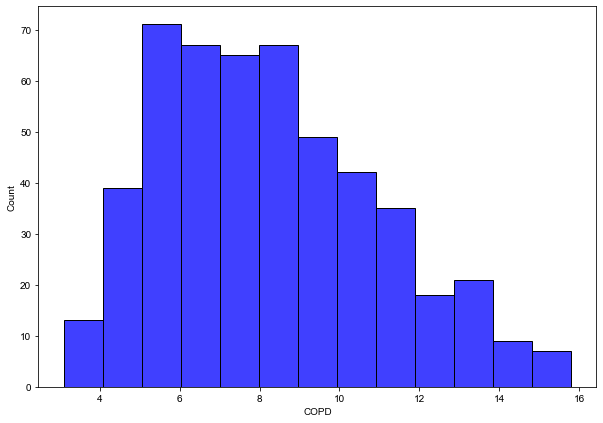

In [89]:
plt.figure(figsize=(10,7))
sns.histplot(df3['COPD'], color='blue');

In [90]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df3['Smoking'], df3['COPD'])

In [92]:
regressors = ['Smoking']

model = sm.OLS(df3['COPD'], sm.add_constant(df3[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   COPD   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     923.4
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          9.36e-116
Time:                        17:14:38   Log-Likelihood:                -952.95
No. Observations:                 503   AIC:                             1910.
Df Residuals:                     501   BIC:                             1918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5025      0.297     -1.694      0.091      -1.085       0.080
Smoking        0.3702      0.012     30.387      0.000       0.346       0.394
==============================================================================
Omnibus:                       21.512   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.131
Skew:                           0.132   Prob(JB):                     4.79e-12
Kurtosis:                       4.555   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

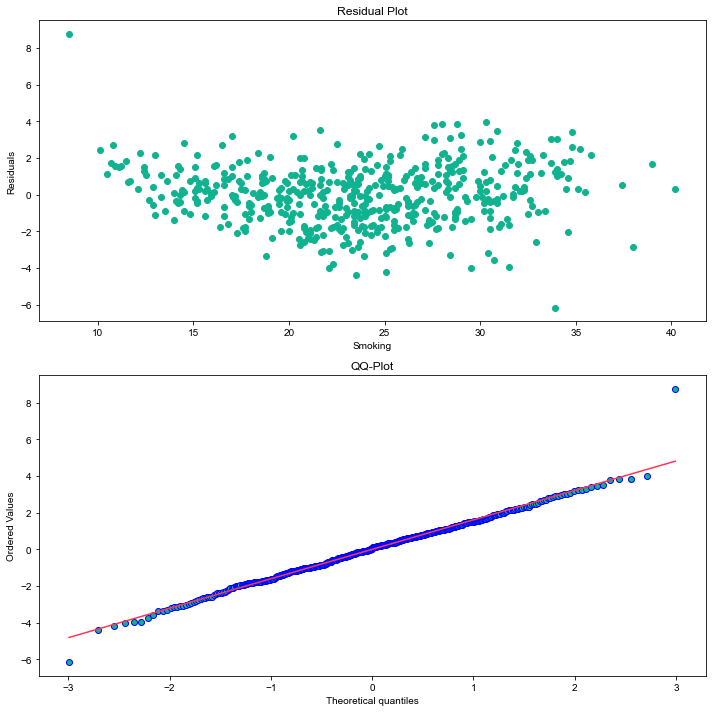

In [93]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df3['COPD'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df3['Smoking'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Smoking')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

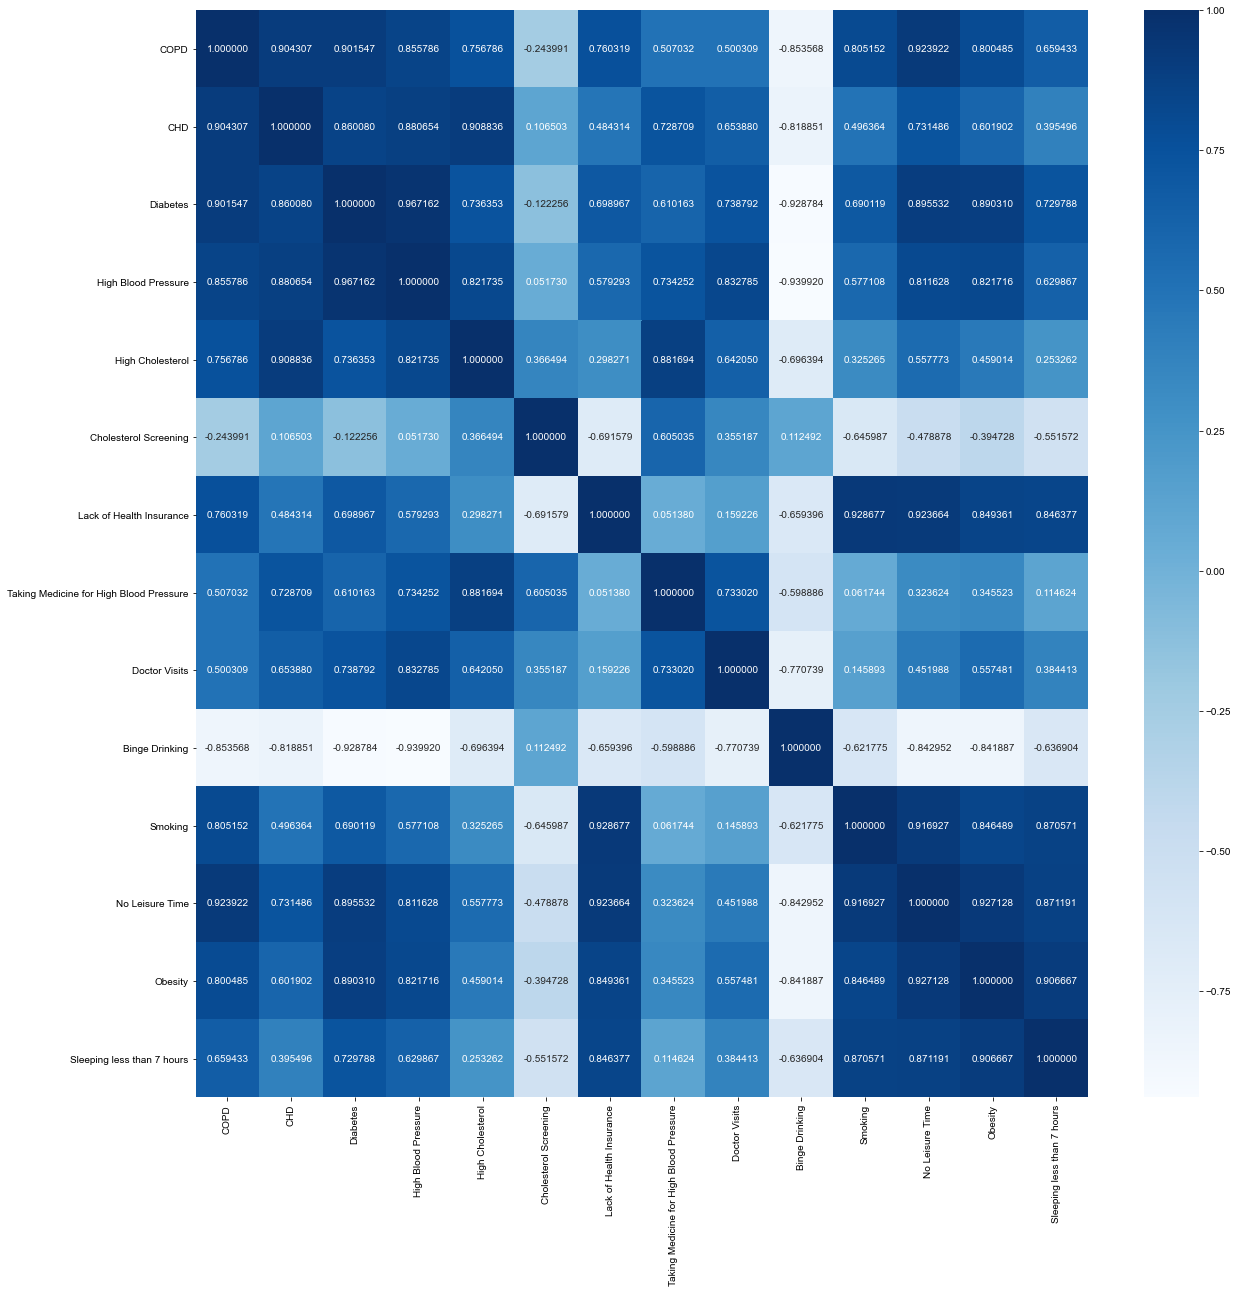

In [94]:
corr_matrix = df3[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# COPD & Binge Drinking

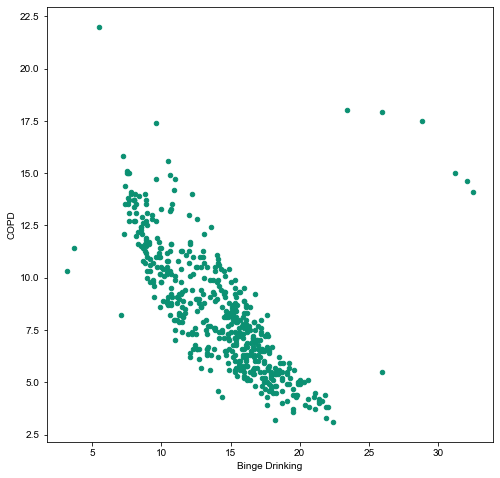

In [95]:
df.plot(kind='scatter', y='COPD', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

In [105]:
Q1_COPD = df['COPD'].quantile(0.25)
Q3_COPD = df['COPD'].quantile(0.75)
IQR_COPD = Q3_COPD - Q1_COPD
Q1_Drinking = df['Binge Drinking'].quantile(0.25)
Q3_Drinking = df['Binge Drinking'].quantile(0.75)
IQR_Drinking = Q3_Drinking - Q1_Drinking
df4 = df[(df['COPD'] > Q1_COPD-1.5*IQR_COPD) & 
            (df['COPD'] < Q3_COPD+1.5*IQR_COPD)]
df4 = df4[(df4['Binge Drinking']>Q1_Drinking-1.5*IQR_Drinking) & 
                (df4['Binge Drinking']<Q3_Drinking+1.5*IQR_Drinking)]
df4

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[508 rows x 16 columns]

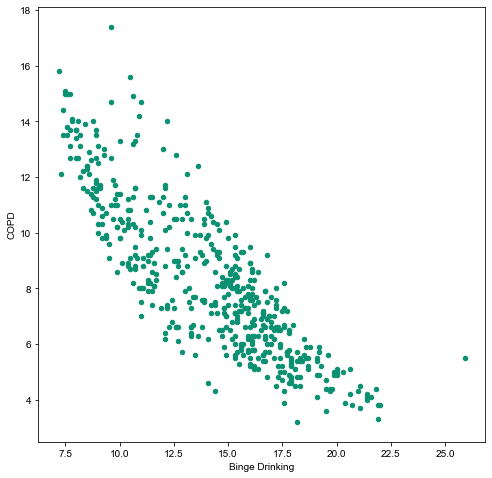

In [107]:
df4.plot(kind='scatter', y='COPD', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

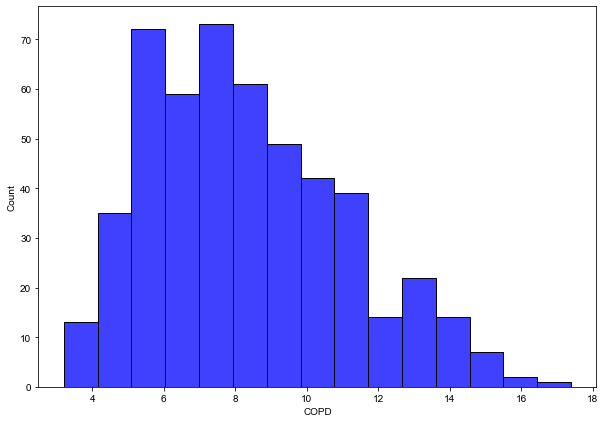

In [108]:
plt.figure(figsize=(10,7))
sns.histplot(df4['COPD'], color='blue');

In [109]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df4['Binge Drinking'], df4['COPD'])

In [110]:
regressors = ['Binge Drinking']

model = sm.OLS(df4['COPD'], sm.add_constant(df4[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   COPD   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          4.81e-139
Time:                        17:47:48   Log-Likelihood:                -903.60
No. Observations:                 503   AIC:                             1811.
Df Residuals:                     501   BIC:                             1820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.6153      0.270     65.305      0.000      17.085      18.145
Binge Drinking    -0.6601      0.019    -35.539      0.000      -0.697      -0.624
==============================================================================
Omnibus:                       18.700   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.613
Skew:                           0.362   Prob(JB):                     7.46e-06
Kurtosis:                       3.777   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

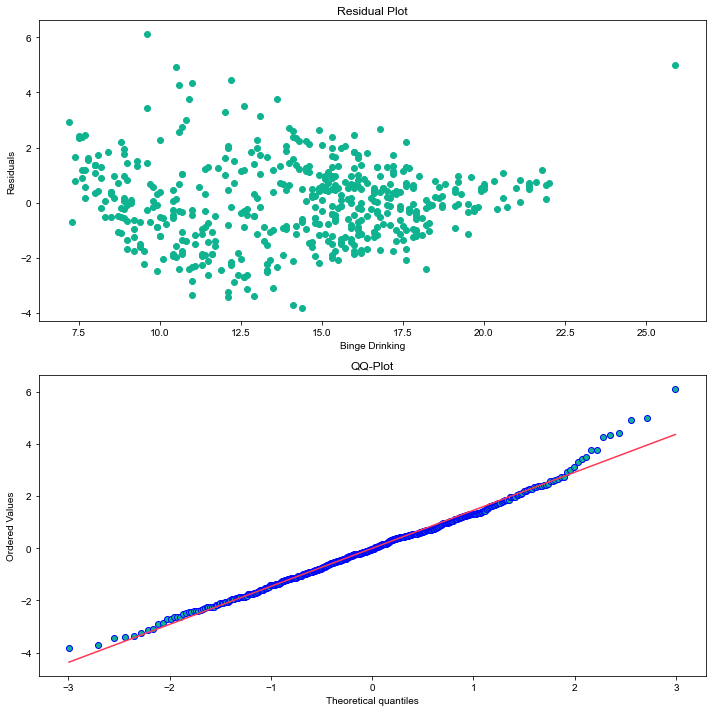

In [111]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df4['COPD'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df4['Binge Drinking'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Binge Drinking')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

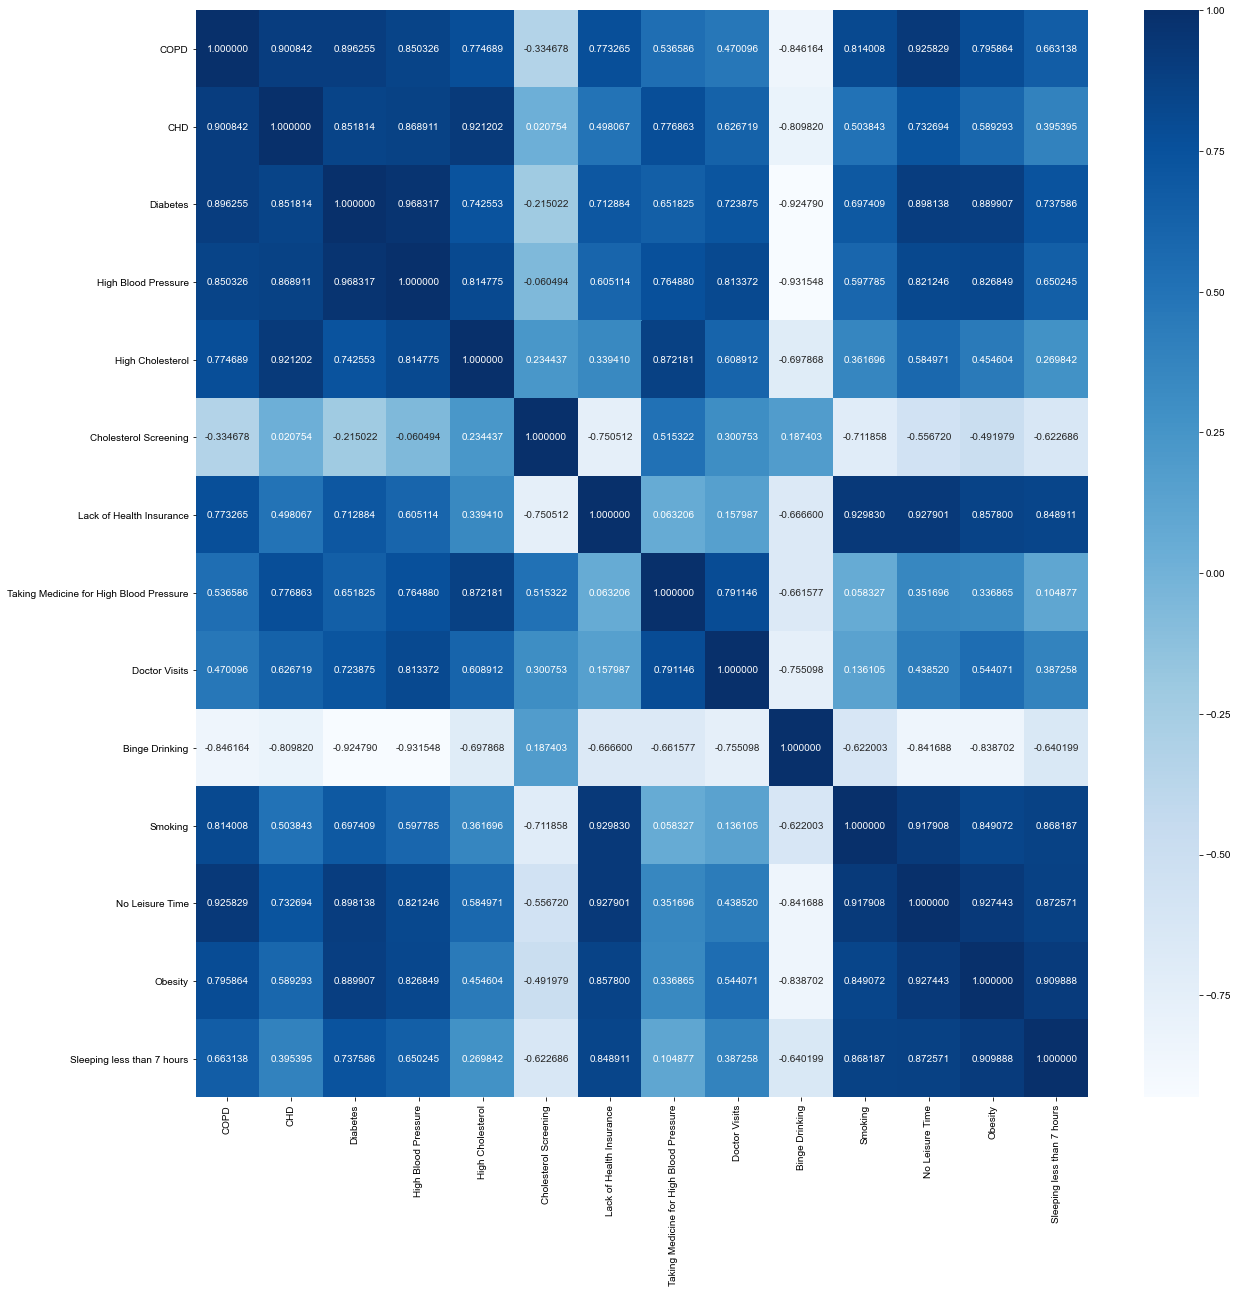

In [112]:
corr_matrix = df4[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# High Blood Pressure & Annual Check Ups

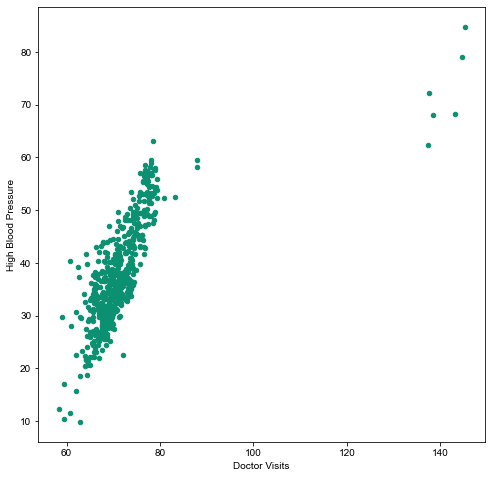

In [103]:
df.plot(kind='scatter', y='High Blood Pressure', x='Doctor Visits', figsize=(8,8), color="#0b9072")
plt.show()

In [113]:
Q1_BP = df['High Blood Pressure'].quantile(0.25)
Q3_BP = df['High Blood Pressure'].quantile(0.75)
IQR_BP = Q3_BP - Q1_BP
Q1_Checkup = df['Doctor Visits'].quantile(0.25)
Q3_Checkup = df['Doctor Visits'].quantile(0.75)
IQR_Checkup = Q3_Checkup - Q1_Checkup
df5 = df[(df['High Blood Pressure'] > Q1_BP-1.5*IQR_BP) & 
            (df['High Blood Pressure'] < Q3_BP+1.5*IQR_BP)]
df5 = df5[(df5['Doctor Visits']>Q1_Checkup-1.5*IQR_Checkup) & 
                (df5['Doctor Visits']<Q3_Checkup+1.5*IQR_Checkup)]
df5

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[503 rows x 16 columns]

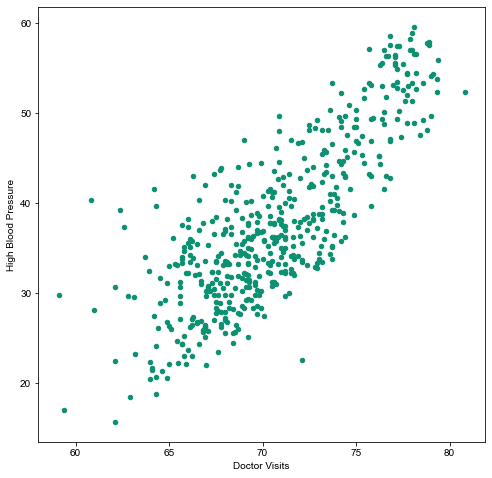

In [114]:
df5.plot(kind='scatter', y='High Blood Pressure', x='Doctor Visits', figsize=(8,8), color="#0b9072")
plt.show()

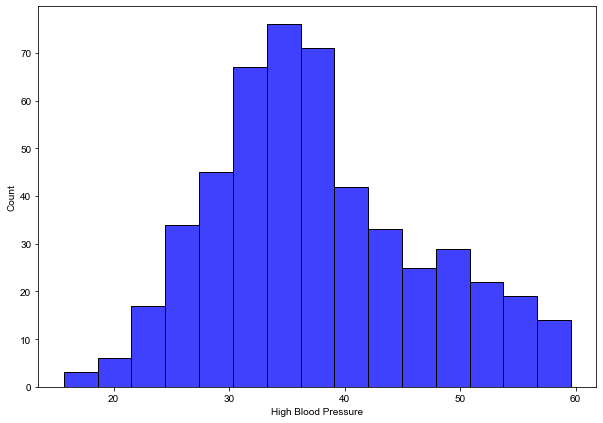

In [115]:
plt.figure(figsize=(10,7))
sns.histplot(df5['High Blood Pressure'], color='blue');

In [124]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df5['Doctor Visits'], df5['High Blood Pressure'])

In [125]:
regressors = ['Doctor Visits']

model = sm.OLS(df5['High Blood Pressure'], sm.add_constant(df5[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     High Blood Pressure   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.661
Method:                  Least Squares   F-statistic:                     979.4
Date:                 Mon, 19 Dec 2022   Prob (F-statistic):          5.91e-120
Time:                         18:06:38   Log-Likelihood:                -1551.0
No. Observations:                  503   AIC:                             3106.
Df Residuals:                      501   BIC:                             3115.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -89.6883      4.076    -22.004      0.000     -97.697     -81.680
Doctor Visits     1.8031      0.058     31.295      0.000       1.690       1.916
==============================================================================
Omnibus:                       11.936   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.347
Skew:                           0.384   Prob(JB):                      0.00208
Kurtosis:                       3.008   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

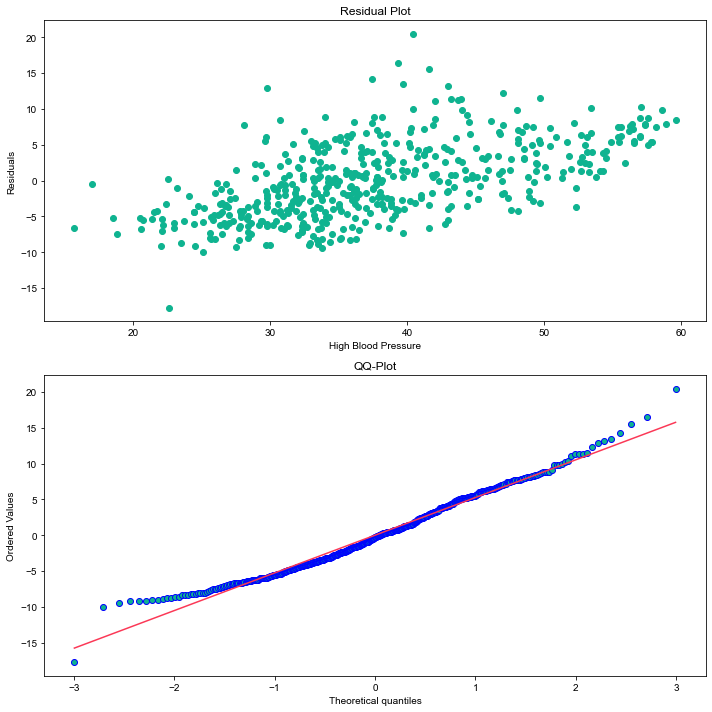

In [126]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df5['High Blood Pressure'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df5['High Blood Pressure'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('High Blood Pressure')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

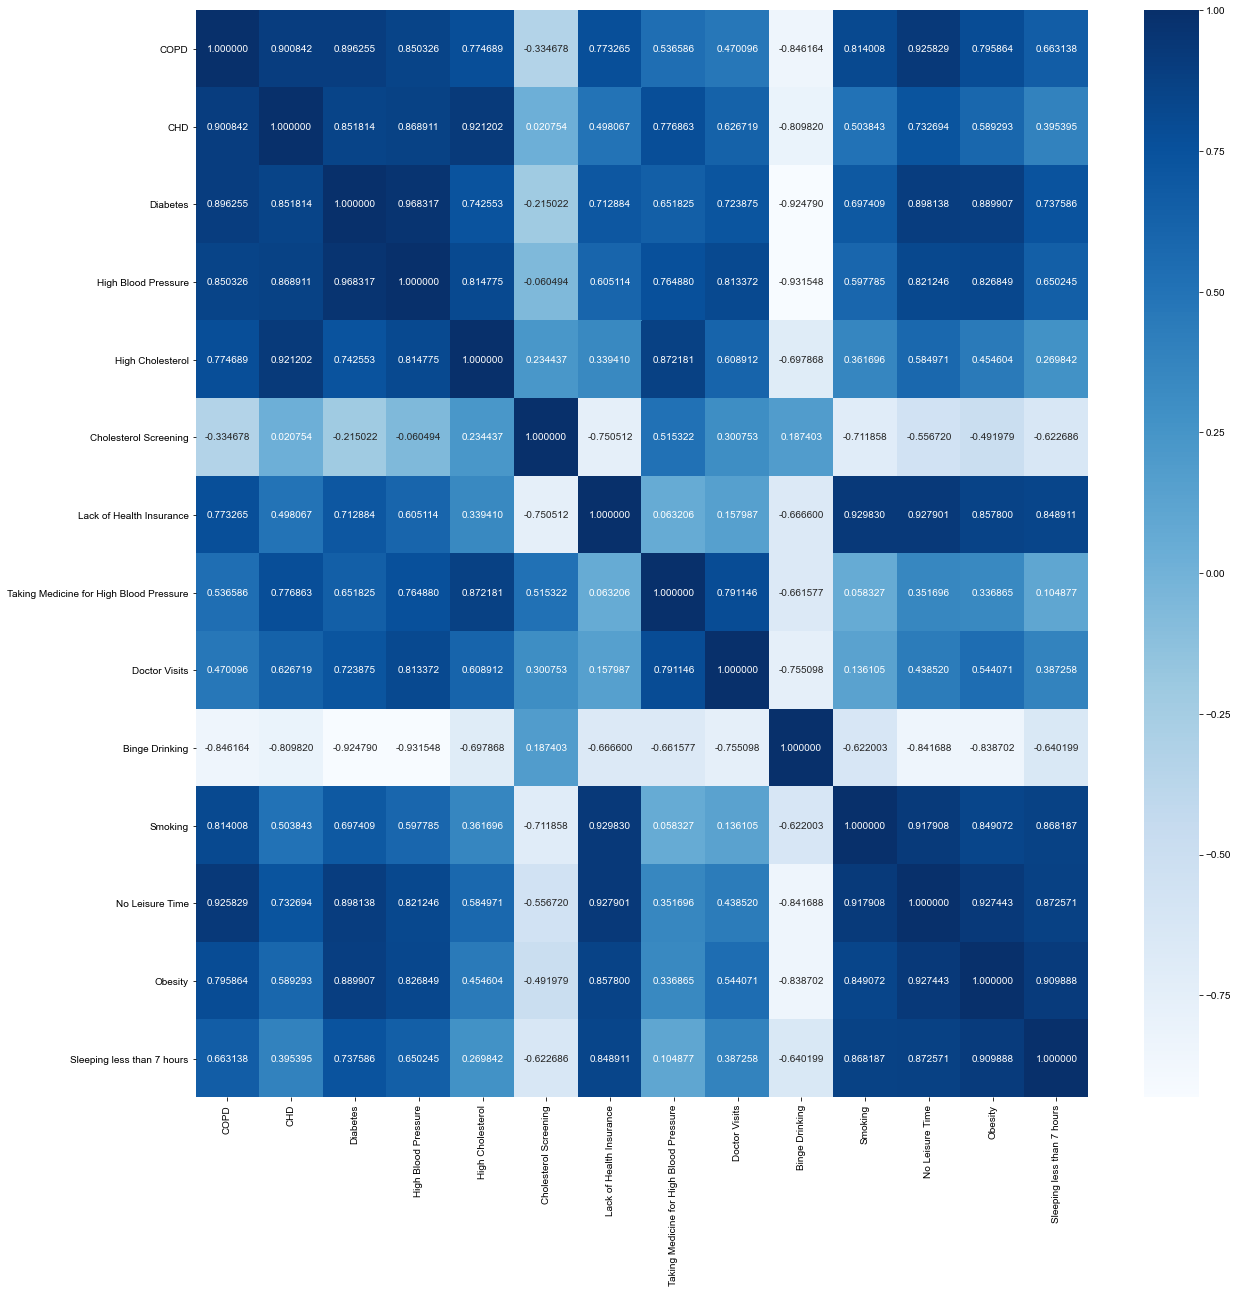

In [127]:
corr_matrix = df5[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# High Blood Pressure and Binge Drinking

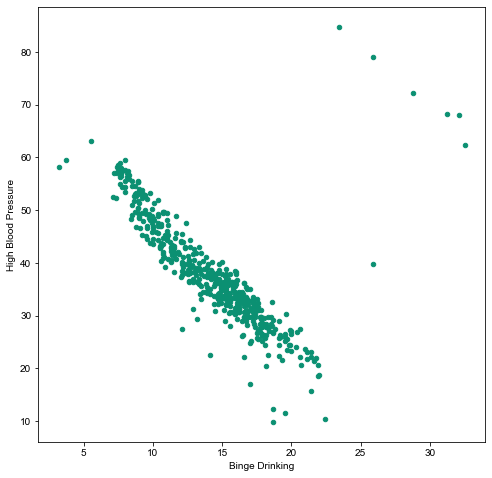

In [120]:
df.plot(kind='scatter', y='High Blood Pressure', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

In [134]:
Q1_BP = df['High Blood Pressure'].quantile(0.25)
Q3_BP = df['High Blood Pressure'].quantile(0.75)
IQR_BP = Q3_BP - Q1_BP
Q1_Binge_Drinking = df['Binge Drinking'].quantile(0.25)
Q3_Binge_Drinking = df['Binge Drinking'].quantile(0.75)
IQR_Binge_Drinking = Q3_Binge_Drinking - Q1_Binge_Drinking
df6 = df[(df['High Blood Pressure'] > Q1_BP-1.5*IQR_BP) & 
            (df['High Blood Pressure'] < Q3_BP+1.5*IQR_BP)]
df6 = df6[(df6['Binge Drinking']>Q1_Binge_Drinking-1.5*IQR_Binge_Drinking) & 
                (df6['Binge Drinking']<Q3_Binge_Drinking+1.5*IQR_Binge_Drinking)]
df6

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[506 rows x 16 columns]

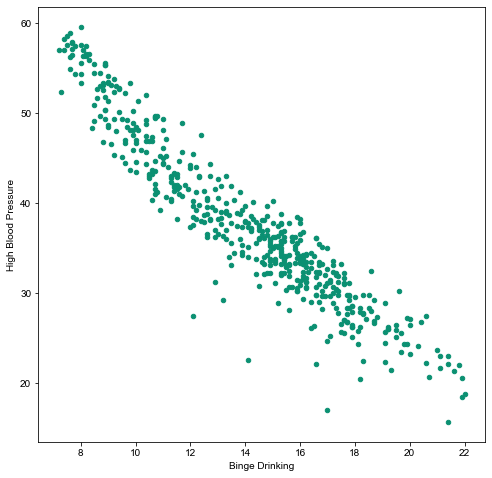

In [122]:
df6.plot(kind='scatter', y='High Blood Pressure', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

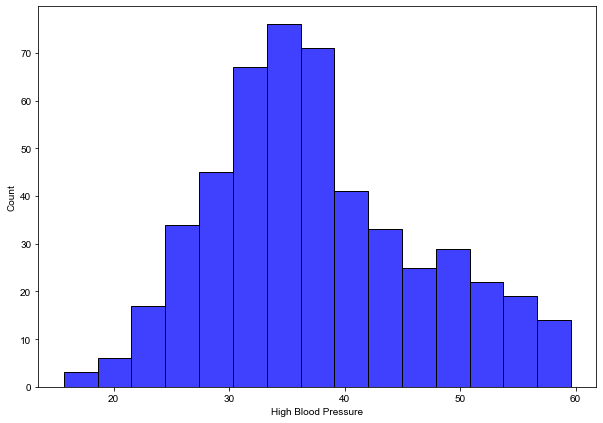

In [123]:
plt.figure(figsize=(10,7))
sns.histplot(df6['High Blood Pressure'], color='blue');

In [128]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df6['Binge Drinking'], df6['High Blood Pressure'])

In [129]:
regressors = ['Binge Drinking']

model = sm.OLS(df6['High Blood Pressure'], sm.add_constant(df6[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     High Blood Pressure   R-squared:                       0.891
Model:                             OLS   Adj. R-squared:                  0.891
Method:                  Least Squares   F-statistic:                     4078.
Date:                 Mon, 19 Dec 2022   Prob (F-statistic):          1.44e-242
Time:                         18:09:17   Log-Likelihood:                -1264.6
No. Observations:                  502   AIC:                             2533.
Df Residuals:                      500   BIC:                             2542.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             72.4204      0.561    129.143      0.000      71.319      73.522
Binge Drinking    -2.4711      0.039    -63.857      0.000      -2.547      -2.395
==============================================================================
Omnibus:                       79.914   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.586
Skew:                          -0.826   Prob(JB):                     6.79e-42
Kurtosis:                       5.517   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

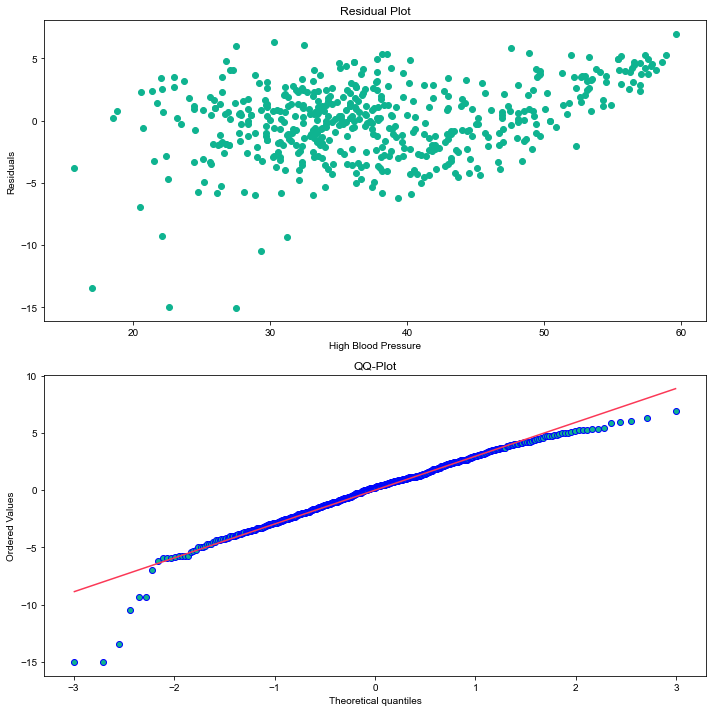

In [130]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df6['High Blood Pressure'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df6['High Blood Pressure'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('High Blood Pressure')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

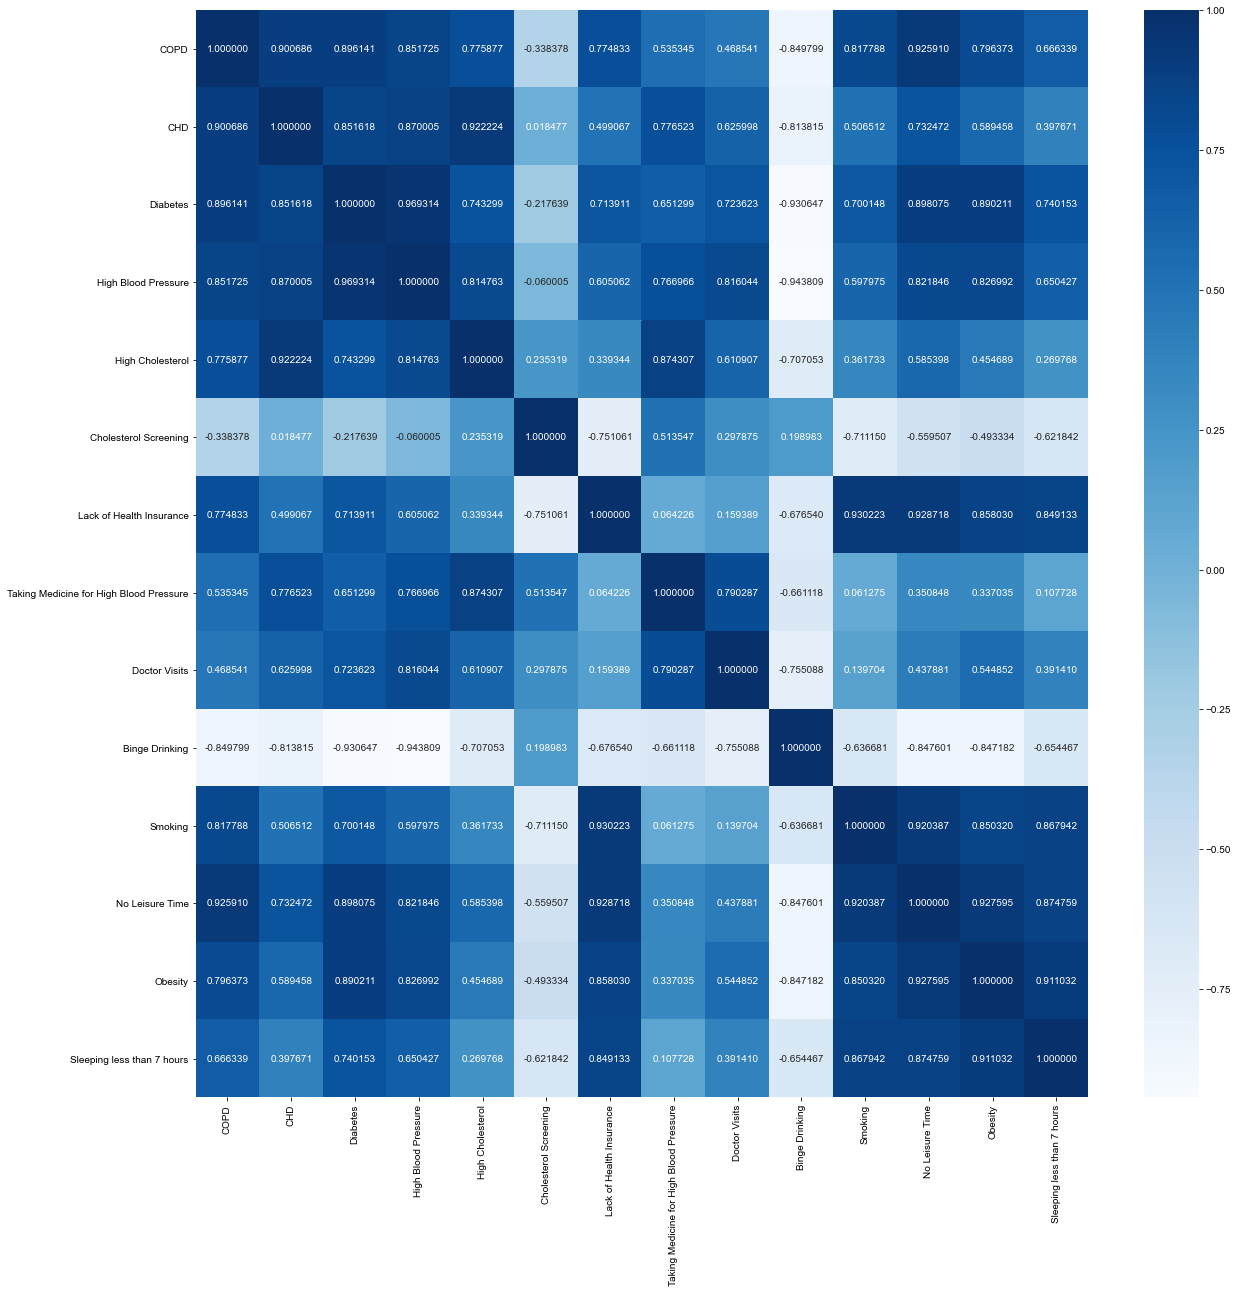

In [131]:
corr_matrix = df6[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# High Blood Pressure and No Leisure Time

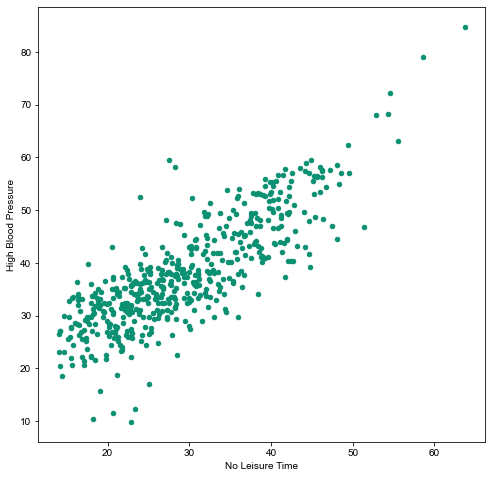

In [133]:
df.plot(kind='scatter', y='High Blood Pressure', x='No Leisure Time', figsize=(8,8), color="#0b9072")
plt.show()

In [143]:
Q1_BP = df['High Blood Pressure'].quantile(0.25)
Q3_BP = df['High Blood Pressure'].quantile(0.75)
IQR_BP = Q3_BP - Q1_BP
Q1_Leisure = df['No Leisure Time'].quantile(0.25)
Q3_Leisure = df['No Leisure Time'].quantile(0.75)
IQR_Leisure = Q3_Leisure - Q1_Leisure
df7 = df[(df['High Blood Pressure'] > Q1_BP-1.5*IQR_BP) & 
            (df['High Blood Pressure'] < Q3_BP+1.5*IQR_BP)]
df7 = df7[(df7['No Leisure Time']>Q1_Leisure-1.5*IQR_Leisure) & 
                (df7['No Leisure Time']<Q3_Leisure+1.5*IQR_Leisure)]
df7

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[508 rows x 16 columns]

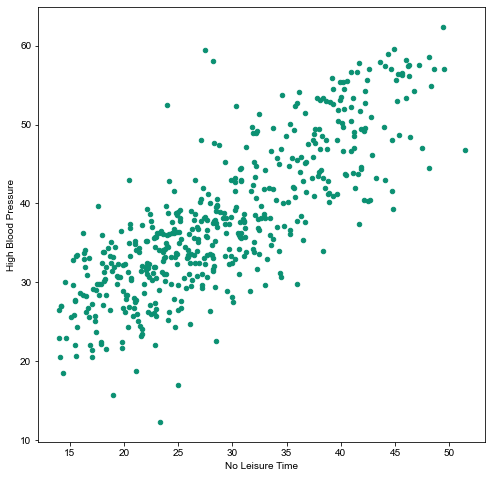

In [144]:
df7.plot(kind='scatter', y='High Blood Pressure', x='No Leisure Time', figsize=(8,8), color="#0b9072")
plt.show()

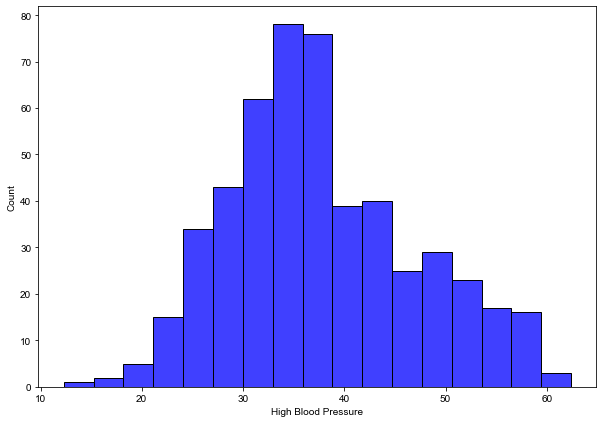

In [145]:
plt.figure(figsize=(10,7))
sns.histplot(df7['High Blood Pressure'], color='blue');

In [146]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df7['No Leisure Time'], df7['High Blood Pressure'])

regressors = ['No Leisure Time']

model = sm.OLS(df7['High Blood Pressure'], sm.add_constant(df7[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     High Blood Pressure   R-squared:                       0.651
Model:                             OLS   Adj. R-squared:                  0.650
Method:                  Least Squares   F-statistic:                     942.2
Date:                 Mon, 19 Dec 2022   Prob (F-statistic):          1.27e-117
Time:                         18:20:56   Log-Likelihood:                -1586.1
No. Observations:                  508   AIC:                             3176.
Df Residuals:                      506   BIC:                             3185.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.5441      0.857     14.632      0.000      10.860      14.228
No Leisure Time     0.8681      0.028     30.695      0.000       0.813       0.924
==============================================================================
Omnibus:                       10.391   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               18.082
Skew:                           0.027   Prob(JB):                     0.000118
Kurtosis:                       3.923   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

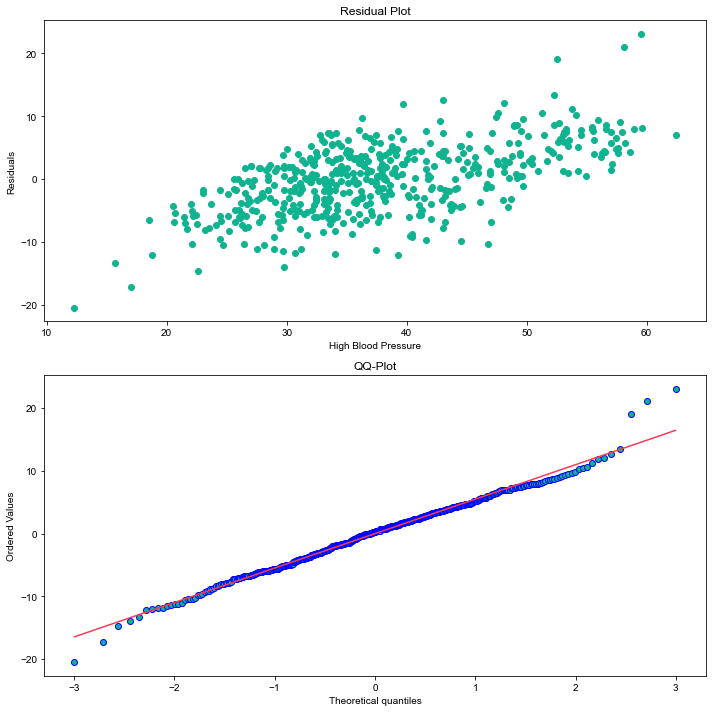

In [147]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df7['High Blood Pressure'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df7['High Blood Pressure'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('High Blood Pressure')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

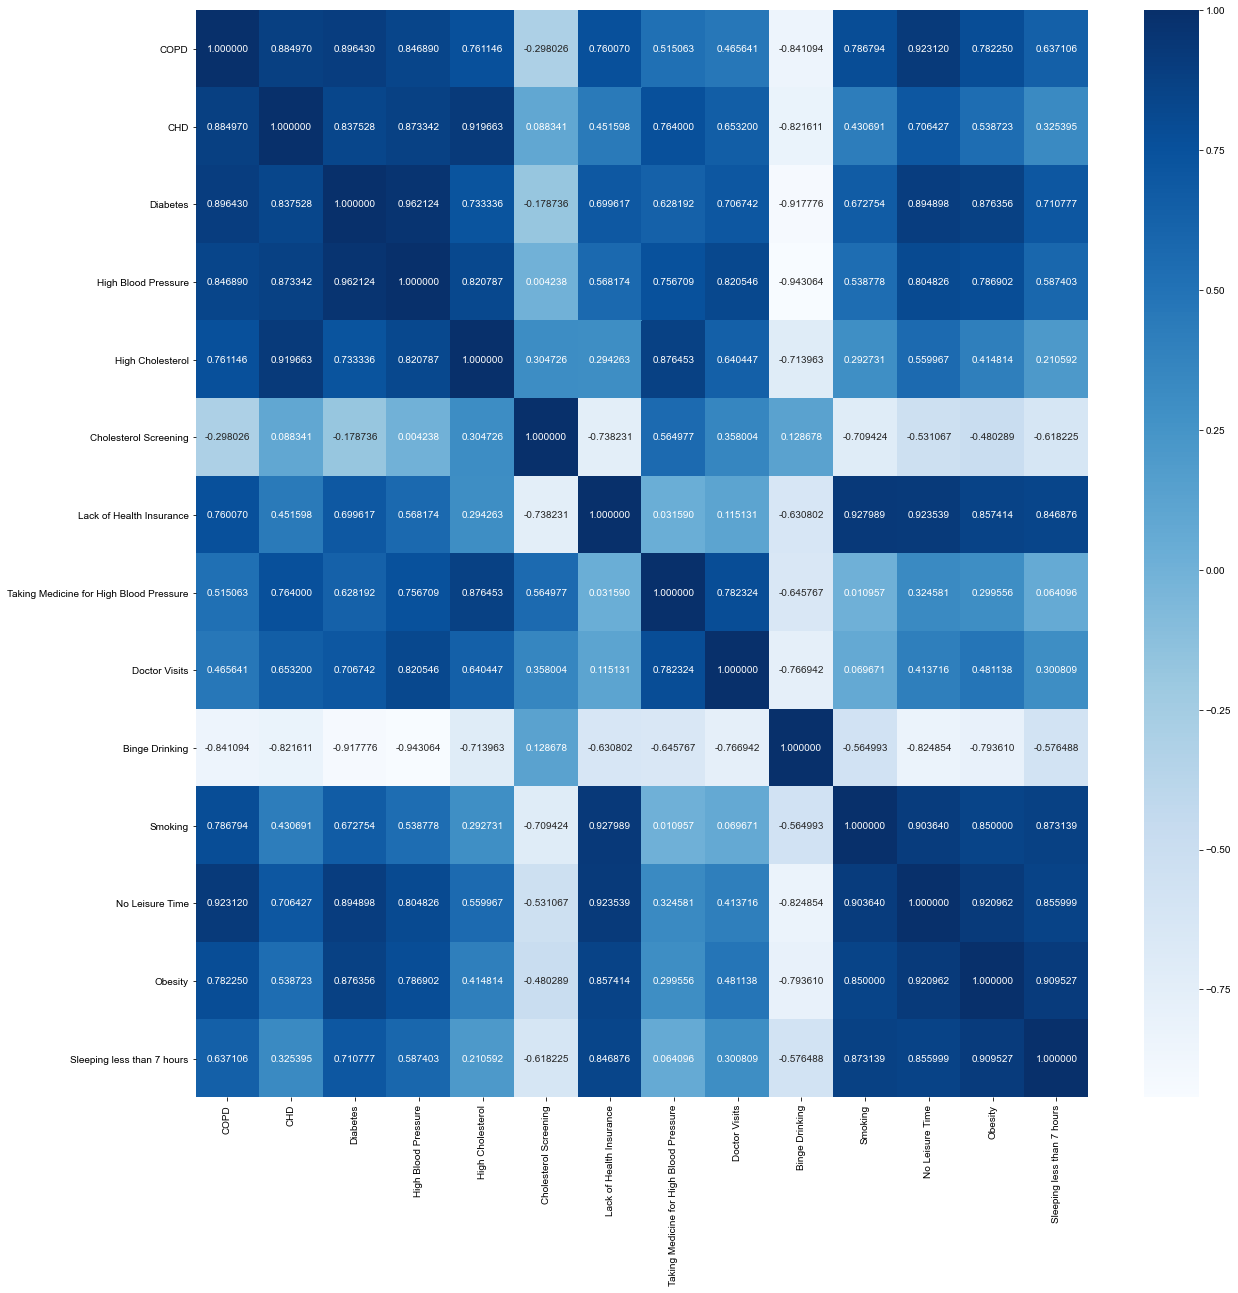

In [140]:
corr_matrix = df7[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# High Cholesterol & Taking Medicine for Blood Pressure Control

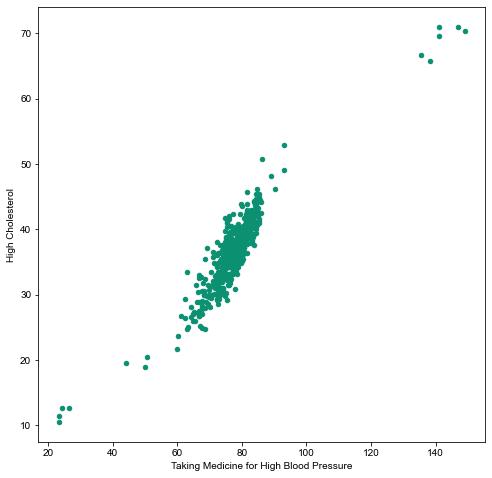

In [142]:
df.plot(kind='scatter', y='High Cholesterol', x='Taking Medicine for High Blood Pressure', figsize=(8,8), color="#0b9072")
plt.show()

In [149]:
Q1_Cholesterol = df['High Cholesterol'].quantile(0.25)
Q3_Cholesterol = df['High Cholesterol'].quantile(0.75)
IQR_Cholesterol = Q3_Cholesterol - Q1_Cholesterol
Q1_Meds = df['Taking Medicine for High Blood Pressure'].quantile(0.25)
Q3_Meds = df['Taking Medicine for High Blood Pressure'].quantile(0.75)
IQR_Meds = Q3_Meds - Q1_Meds
df8 = df[(df['High Cholesterol'] > Q1_Cholesterol-1.5*IQR_Cholesterol) & 
            (df['High Cholesterol'] < Q3_BP+1.5*IQR_BP)]
df8 = df8[(df8['Taking Medicine for High Blood Pressure']>Q1_Meds-1.5*IQR_Meds) & 
                (df8['Taking Medicine for High Blood Pressure']<Q3_Meds+1.5*IQR_Meds)]
df8

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[494 rows x 16 columns]

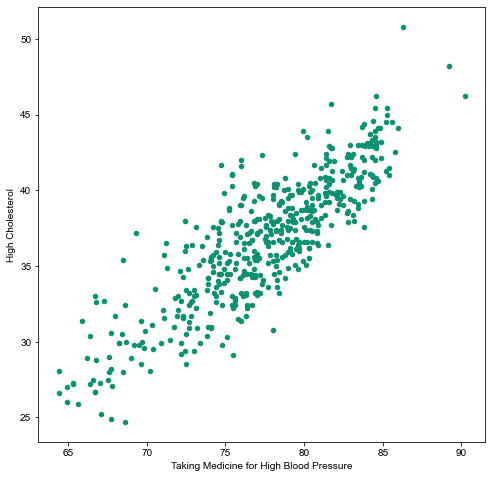

In [150]:
df8.plot(kind='scatter', y='High Cholesterol', x='Taking Medicine for High Blood Pressure', figsize=(8,8), color="#0b9072")
plt.show()

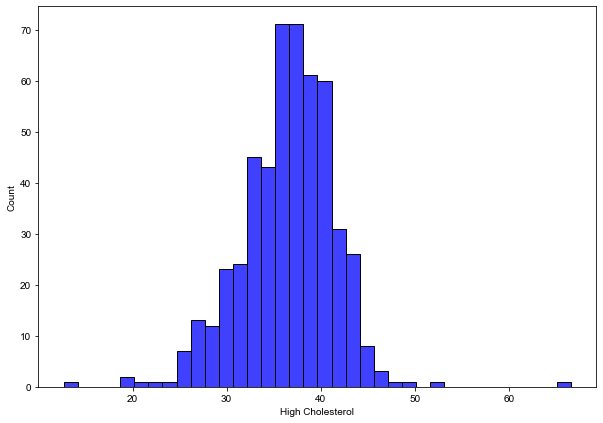

In [151]:
plt.figure(figsize=(10,7))
sns.histplot(df7['High Cholesterol'], color='blue');

In [152]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df7['No Leisure Time'], df7['High Blood Pressure'])

regressors = ['Taking Medicine for High Blood Pressure']

model = sm.OLS(df8['High Cholesterol'], sm.add_constant(df8[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       High Cholesterol   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1359.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.09e-143
Time:                        18:25:58   Log-Likelihood:                -1099.7
No. Observations:                 494   AIC:                             2203.
Df Residuals:                     492   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     -22.8914      1.620    -14.131      0.000     -26.074     -19.709
Taking Medicine for High Blood Pressure     0.7700      0.021     36.871      0.000       0.729       0.811
==============================================================================
Omnibus:                       11.253   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.374
Skew:                           0.349   Prob(JB):                      0.00339
Kurtosis:                       3.254   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

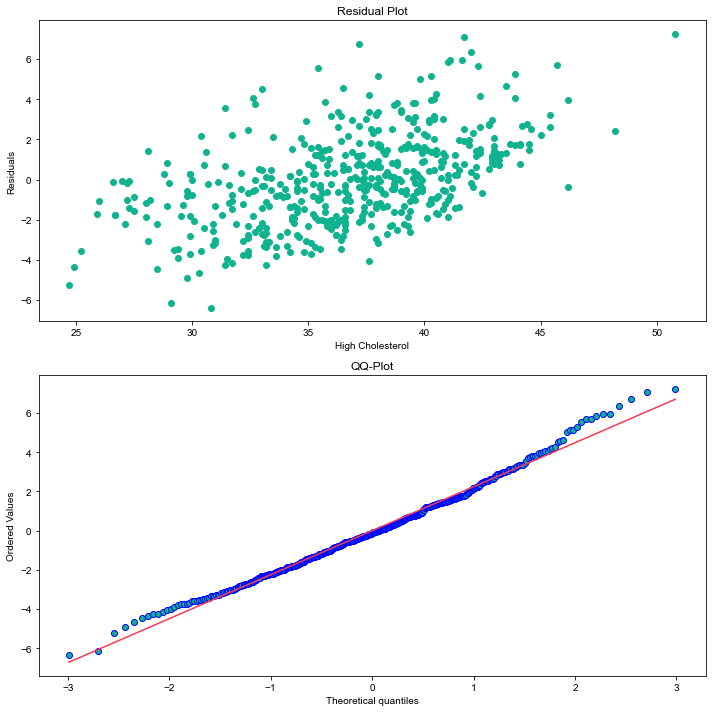

In [153]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df8['High Cholesterol'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df8['High Cholesterol'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('High Cholesterol')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

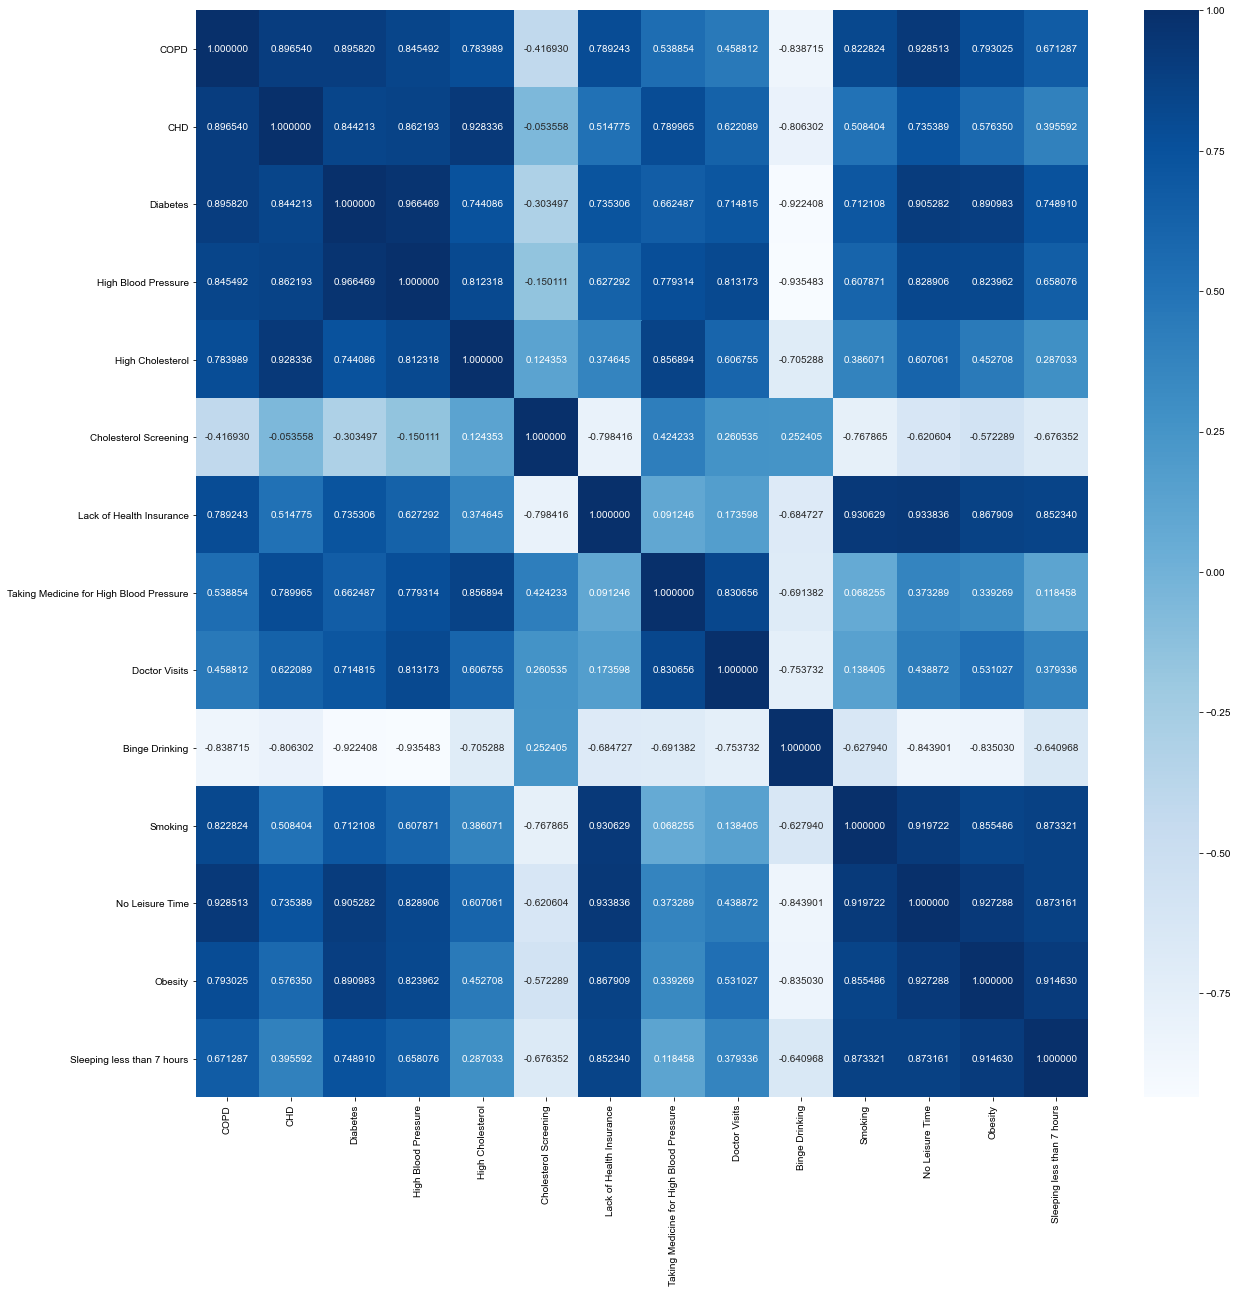

In [154]:
corr_matrix = df8[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# Diabetes and Binge Drinking

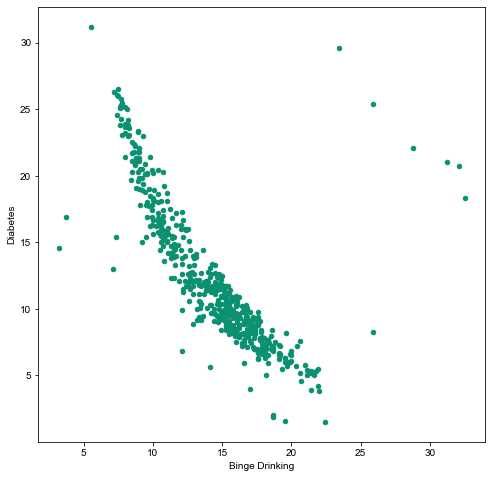

In [155]:
df.plot(kind='scatter', y='Diabetes', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

In [156]:
Q1_Diabetes = df['Diabetes'].quantile(0.25)
Q3_Diabetes = df['Diabetes'].quantile(0.75)
IQR_Diabetes = Q3_Diabetes - Q1_Diabetes
Q1_Binge_Drinking = df['Binge Drinking'].quantile(0.25)
Q3_Binge_Drinking = df['Binge Drinking'].quantile(0.75)
IQR_Binge_Drinking = Q3_Binge_Drinking - Q1_Binge_Drinking
df9 = df[(df['Diabetes'] > Q1_Diabetes-1.5*IQR_Diabetes) & 
            (df['Diabetes'] < Q3_Diabetes+1.5*IQR_Diabetes)]
df9 = df9[(df9['Binge Drinking']>Q1_Binge_Drinking-1.5*IQR_Binge_Drinking) & 
                (df9['Binge Drinking']<Q3_Binge_Drinking+1.5*IQR_Binge_Drinking)]
df9

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[507 rows x 16 columns]

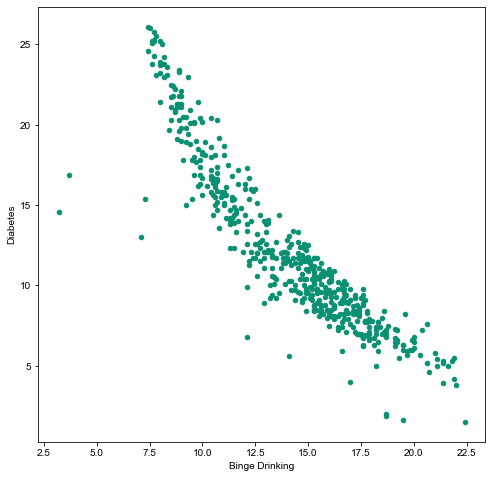

In [157]:
df9.plot(kind='scatter', y='Diabetes', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

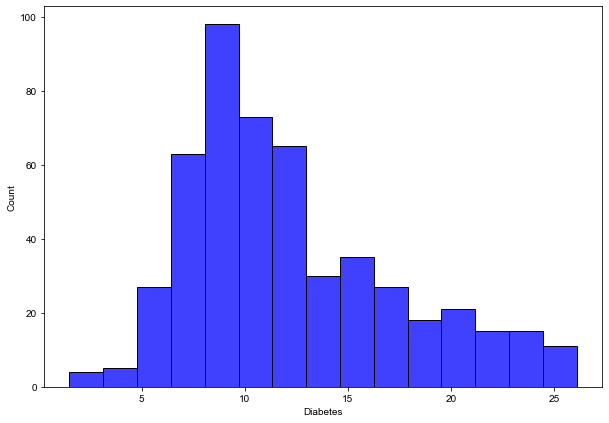

In [160]:
plt.figure(figsize=(10,7))
sns.histplot(df9['Diabetes'], color='blue');

In [161]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df9['Binge Drinking'], df9['Diabetes'])

regressors = ['Binge Drinking']

model = sm.OLS(df9['Diabetes'], sm.add_constant(df9[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2722.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.51e-205
Time:                        18:38:53   Log-Likelihood:                -1076.5
No. Observations:                 507   AIC:                             2157.
Df Residuals:                     505   BIC:                             2165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.8551      0.369     83.722      0.000      30.131      31.579
Binge Drinking    -1.3239      0.025    -52.178      0.000      -1.374      -1.274
==============================================================================
Omnibus:                       85.071   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.185
Skew:                          -0.698   Prob(JB):                     6.04e-74
Kurtosis:                       6.743   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

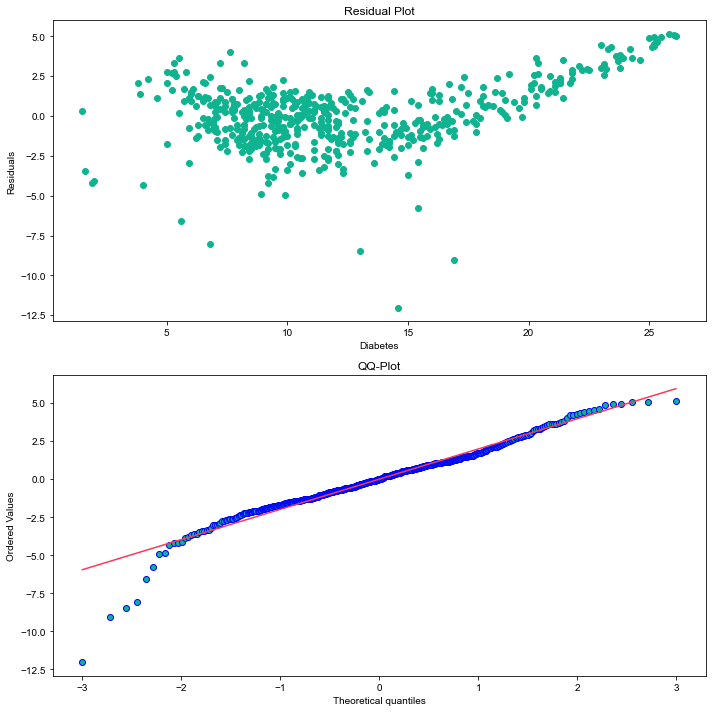

In [162]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df9['Diabetes'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df9['Diabetes'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Diabetes')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

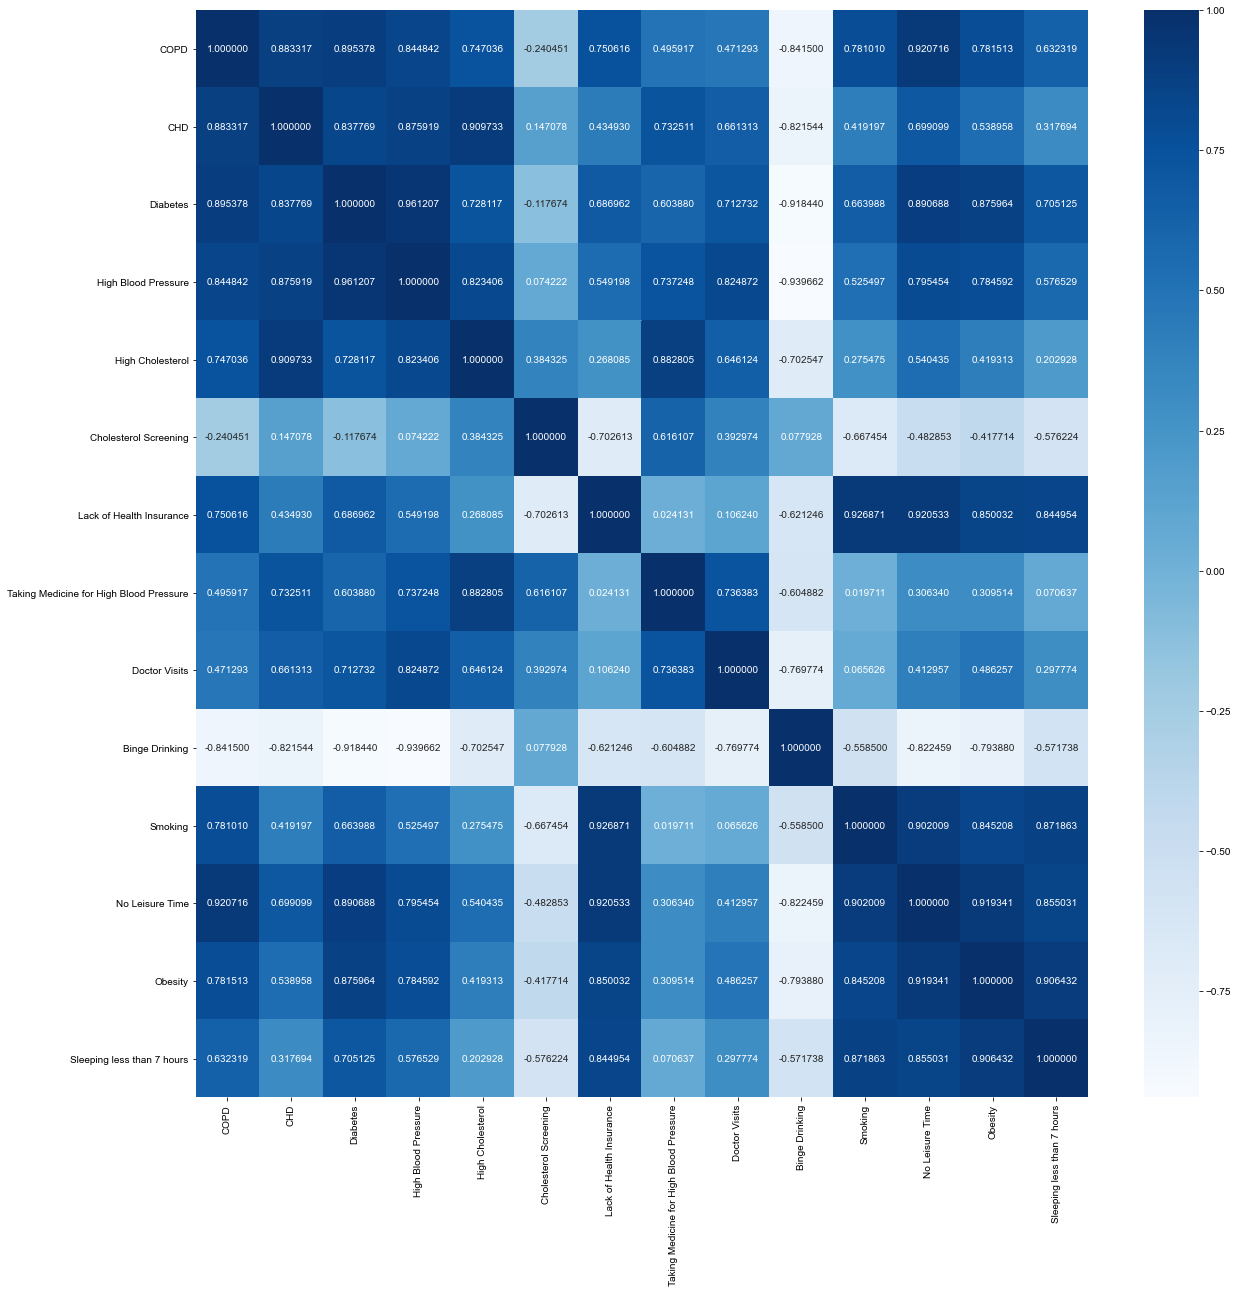

In [163]:
corr_matrix = df9[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# Diabetes and No Leisure Time

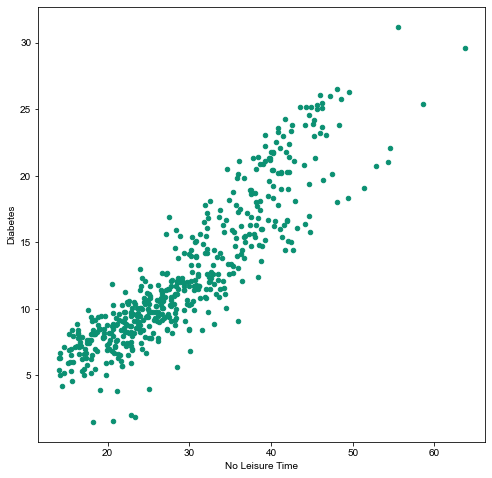

In [164]:
df.plot(kind='scatter', y='Diabetes', x='No Leisure Time', figsize=(8,8), color="#0b9072")
plt.show()

In [165]:
Q1_Diabetes = df['Diabetes'].quantile(0.25)
Q3_Diabetes = df['Diabetes'].quantile(0.75)
IQR_Diabetes = Q3_Diabetes - Q1_Diabetes
Q1_Leisure = df['No Leisure Time'].quantile(0.25)
Q3_Leisure = df['No Leisure Time'].quantile(0.75)
IQR_Leisure = Q3_Leisure - Q1_Leisure
df10 = df[(df['Diabetes'] > Q1_Diabetes-1.5*IQR_Diabetes) & 
            (df['Diabetes'] < Q3_Diabetes+1.5*IQR_Diabetes)]
df10 = df10[(df10['No Leisure Time']>Q1_Leisure-1.5*IQR_Leisure) & 
                (df10['No Leisure Time']<Q3_Leisure+1.5*IQR_Leisure)]
df10

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[512 rows x 16 columns]

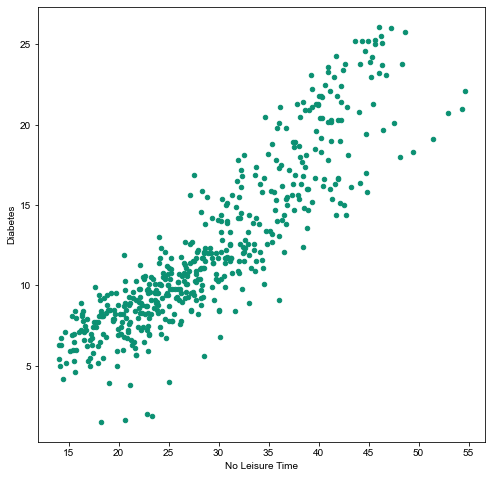

In [166]:
df10.plot(kind='scatter', y='Diabetes', x='No Leisure Time', figsize=(8,8), color="#0b9072")
plt.show()

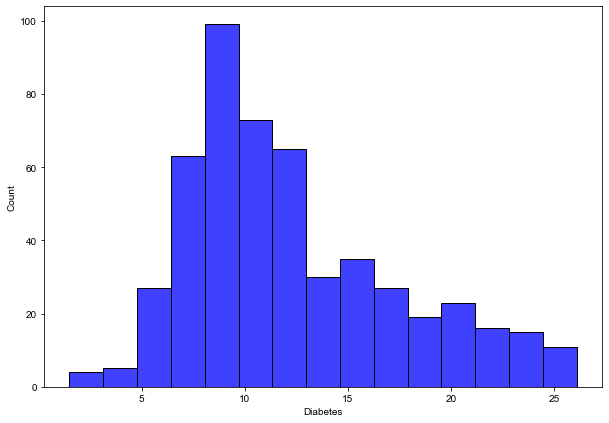

In [167]:
plt.figure(figsize=(10,7))
sns.histplot(df10['Diabetes'], color='blue');

In [168]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df10['No Leisure Time'], df10['Diabetes'])

regressors = ['No Leisure Time']

model = sm.OLS(df10['Diabetes'], sm.add_constant(df10[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1945.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          3.76e-176
Time:                        18:45:27   Log-Likelihood:                -1162.8
No. Observations:                 512   AIC:                             2330.
Df Residuals:                     510   BIC:                             2338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9570      0.360     -8.204      0.000      -3.665      -2.249
No Leisure Time     0.5235      0.012     44.100      0.000       0.500       0.547
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.332
Skew:                          -0.123   Prob(JB):                        0.514
Kurtosis:                       3.042   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

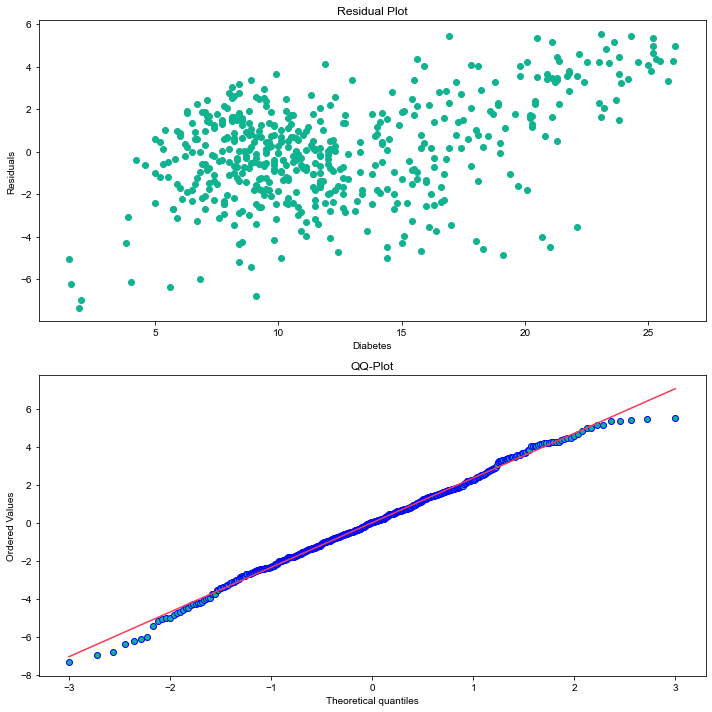

In [169]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df10['Diabetes'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df10['Diabetes'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Diabetes')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

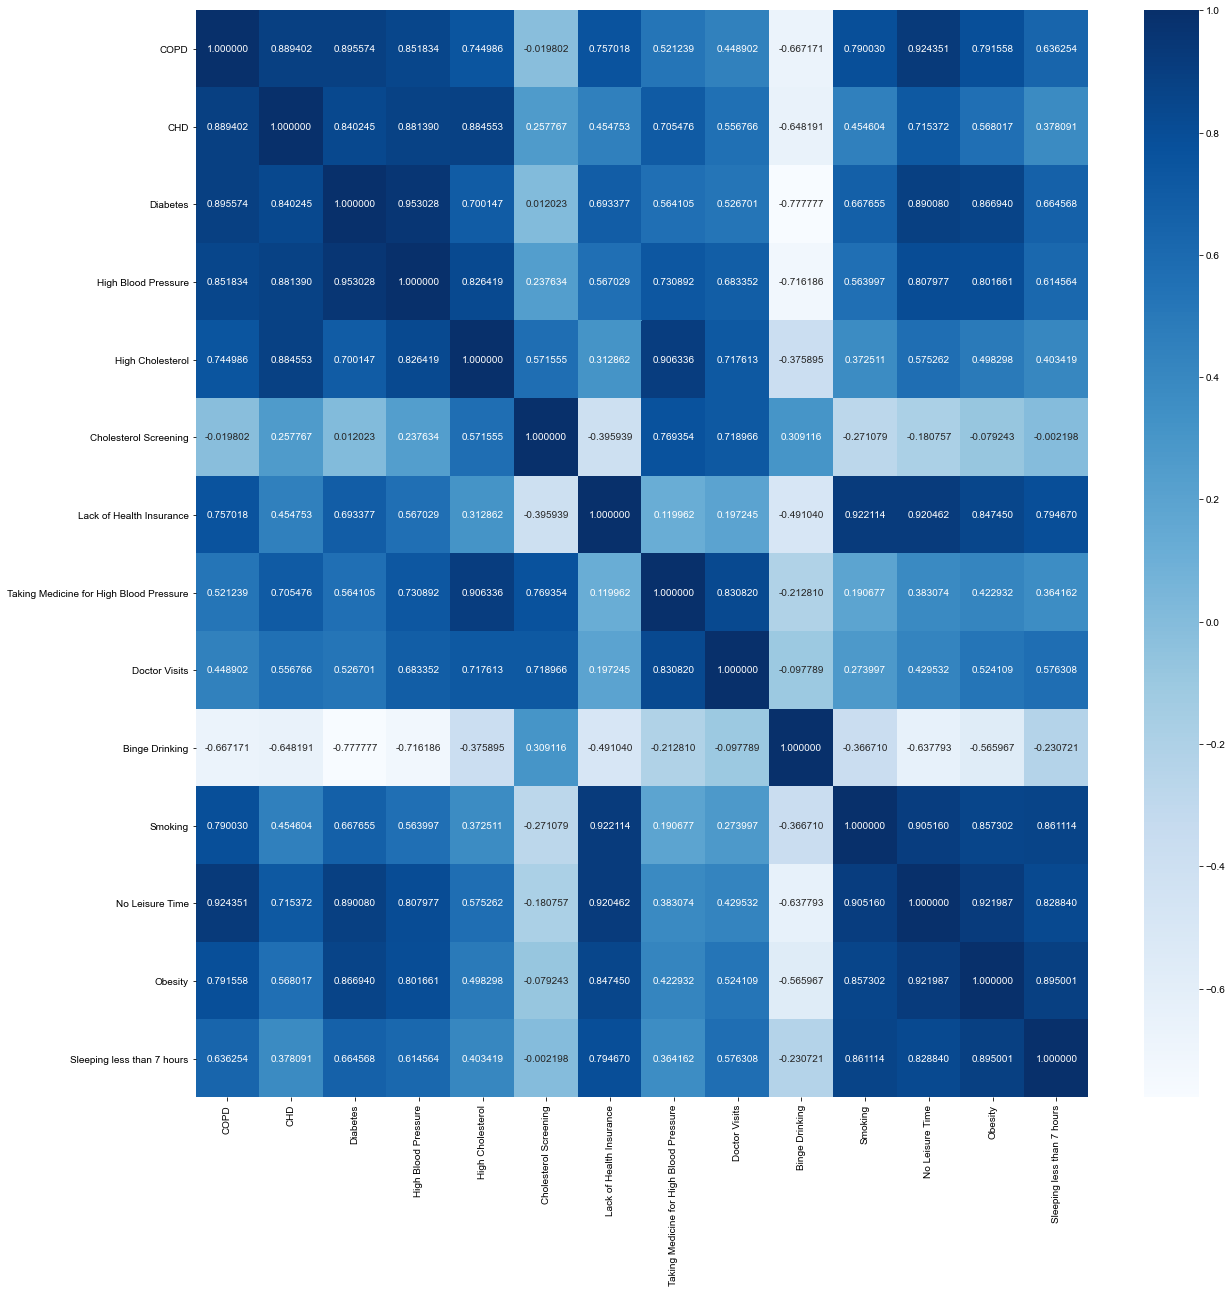

In [170]:
corr_matrix = df10[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');

# Diabetes and Obesity

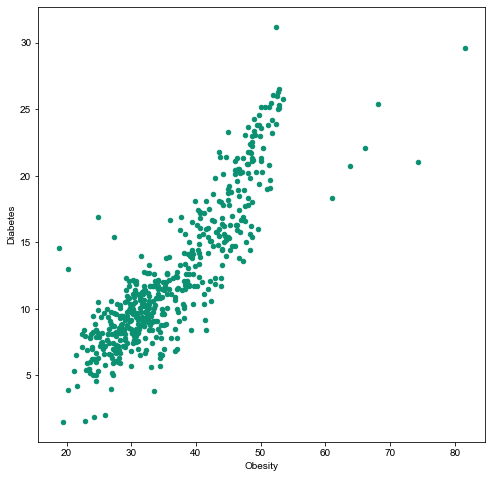

In [171]:
df.plot(kind='scatter', y='Diabetes', x='Obesity', figsize=(8,8), color="#0b9072")
plt.show()

In [173]:
Q1_Diabetes = df['Diabetes'].quantile(0.25)
Q3_Diabetes = df['Diabetes'].quantile(0.75)
IQR_Diabetes = Q3_Diabetes - Q1_Diabetes
Q1_Obesity = df['Obesity'].quantile(0.25)
Q3_Obesity = df['Obesity'].quantile(0.75)
IQR_Obesity = Q3_Obesity - Q1_Obesity
df11 = df[(df['Diabetes'] > Q1_Diabetes-1.5*IQR_Diabetes) & 
            (df['Diabetes'] < Q3_Diabetes+1.5*IQR_Diabetes)]
df11 = df11[(df11['Obesity']>Q1_Obesity-1.5*IQR_Obesity) & 
                (df11['Obesity']<Q3_Obesity+1.5*IQR_Obesity)]
df11

CITYNAME             UNIQUEID  COPD   CHD  Diabetes  \
1    Chattanooga  4714000-47065000400  13.7  10.5      23.7   
2    Chattanooga  4714000-47065000600   5.6   5.3       7.4   
3    Chattanooga  4714000-47065000700   5.0   4.2       6.2   
4    Chattanooga  4714000-47065000800   7.4   5.4      10.2   
5    Chattanooga  4714000-47065001100   9.4   7.5      16.3   
..           ...                  ...   ...   ...       ...   
538    Nashville  4752006-47037019200   7.2   5.2       9.8   
539    Nashville  4752006-47037019300  14.7   8.4      18.0   
540    Nashville  4752006-47037019400   6.0   5.0      10.8   
541    Nashville  4752006-47037019500   5.1   4.0       7.6   
542    Nashville  4752006-47037019600   7.4   5.7       9.2   

     High Blood Pressure  High Cholesterol  Cholesterol Screening  \
1                   57.6              43.3                   72.9   
2                   29.8              33.2                   81.6   
3                   25.6              29.9                   78.2   
4                   33.2              33.0                   74.3   
5                   45.7              38.7                   70.6   
..                   ...               ...                    ...   
538                 32.4              34.5                   74.9   
539                 44.5              39.8                   59.3   
540                 36.3              34.4                   74.8   
541                 27.5              30.5                   71.1   
542                 32.4              35.4                   72.9   

     Lack of Health Insurance  Taking Medicine for High Blood Pressure  \
1                        26.3                                     84.3   
2                         8.4                                     76.9   
3                         8.6                                     73.4   
4                        14.9                                     75.4   
5                        20.1                                     80.4   
..                        ...                                      ...   
538                      14.6                                     74.7   
539                      30.7                                     74.9   
540                      13.7                                     77.2   
541                      13.6                                     68.4   
542                      16.8                                     74.1   

     Doctor Visits  Binge Drinking  Smoking  No Leisure Time  Obesity  \
1             78.9             8.0     32.6             46.3     48.0   
2             69.6            16.6     15.7             17.7     25.3   
3             68.0            17.6     15.7             16.8     24.3   
4             68.7            15.3     24.1             25.9     32.3   
5             73.4            11.7     25.8             34.1     40.1   
..             ...             ...      ...              ...      ...   
538           67.6            16.6     24.0             26.1     33.3   
539           69.9             9.6     40.2             48.1     48.7   
540           70.6            15.7     20.2             24.4     33.9   
541           64.2            20.6     21.4             21.0     30.5   
542           67.3            17.2     23.9             26.6     31.8   

     Sleeping less than 7 hours  
1                          50.0  
2                          32.8  
3                          32.8  
4                          39.4  
5                          44.1  
..                          ...  
538                        40.7  
539                        51.2  
540                        41.0  
541                        39.7  
542                        40.1  

[509 rows x 16 columns]

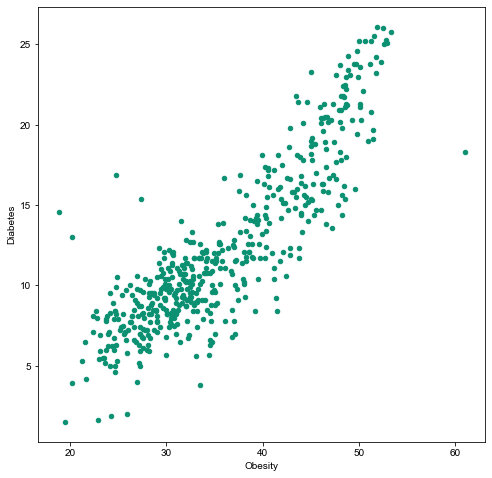

In [174]:
df11.plot(kind='scatter', y='Diabetes', x='Obesity', figsize=(8,8), color="#0b9072")
plt.show()

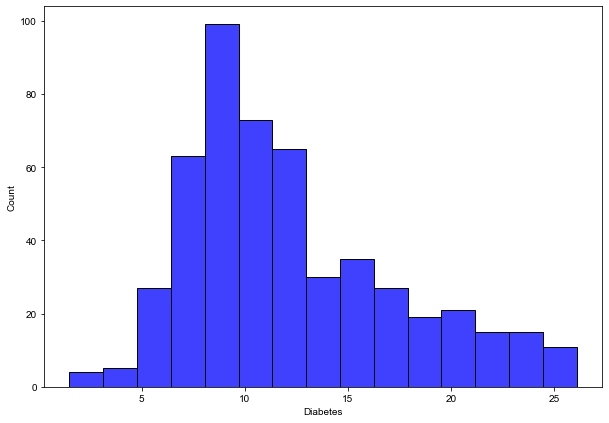

In [175]:
plt.figure(figsize=(10,7))
sns.histplot(df11['Diabetes'], color='blue');

In [176]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df11['Obesity'], df11['Diabetes'])

regressors = ['Obesity']

model = sm.OLS(df11['Diabetes'], sm.add_constant(df11[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1632.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.26e-160
Time:                        18:50:20   Log-Likelihood:                -1186.4
No. Observations:                 509   AIC:                             2377.
Df Residuals:                     507   BIC:                             2385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0780      0.490    -14.443      0.000      -8.041      -6.115
Obesity        0.5403      0.013     40.402      0.000       0.514       0.567
==============================================================================
Omnibus:                       24.108   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.557
Skew:                           0.235   Prob(JB):                     3.87e-12
Kurtosis:                       4.503   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

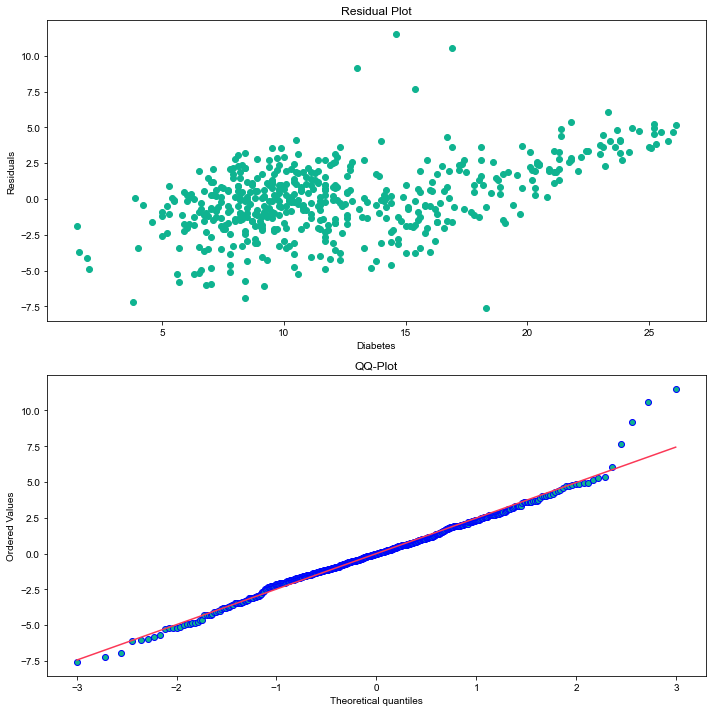

In [177]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = df11['Diabetes'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = df11['Diabetes'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Diabetes')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

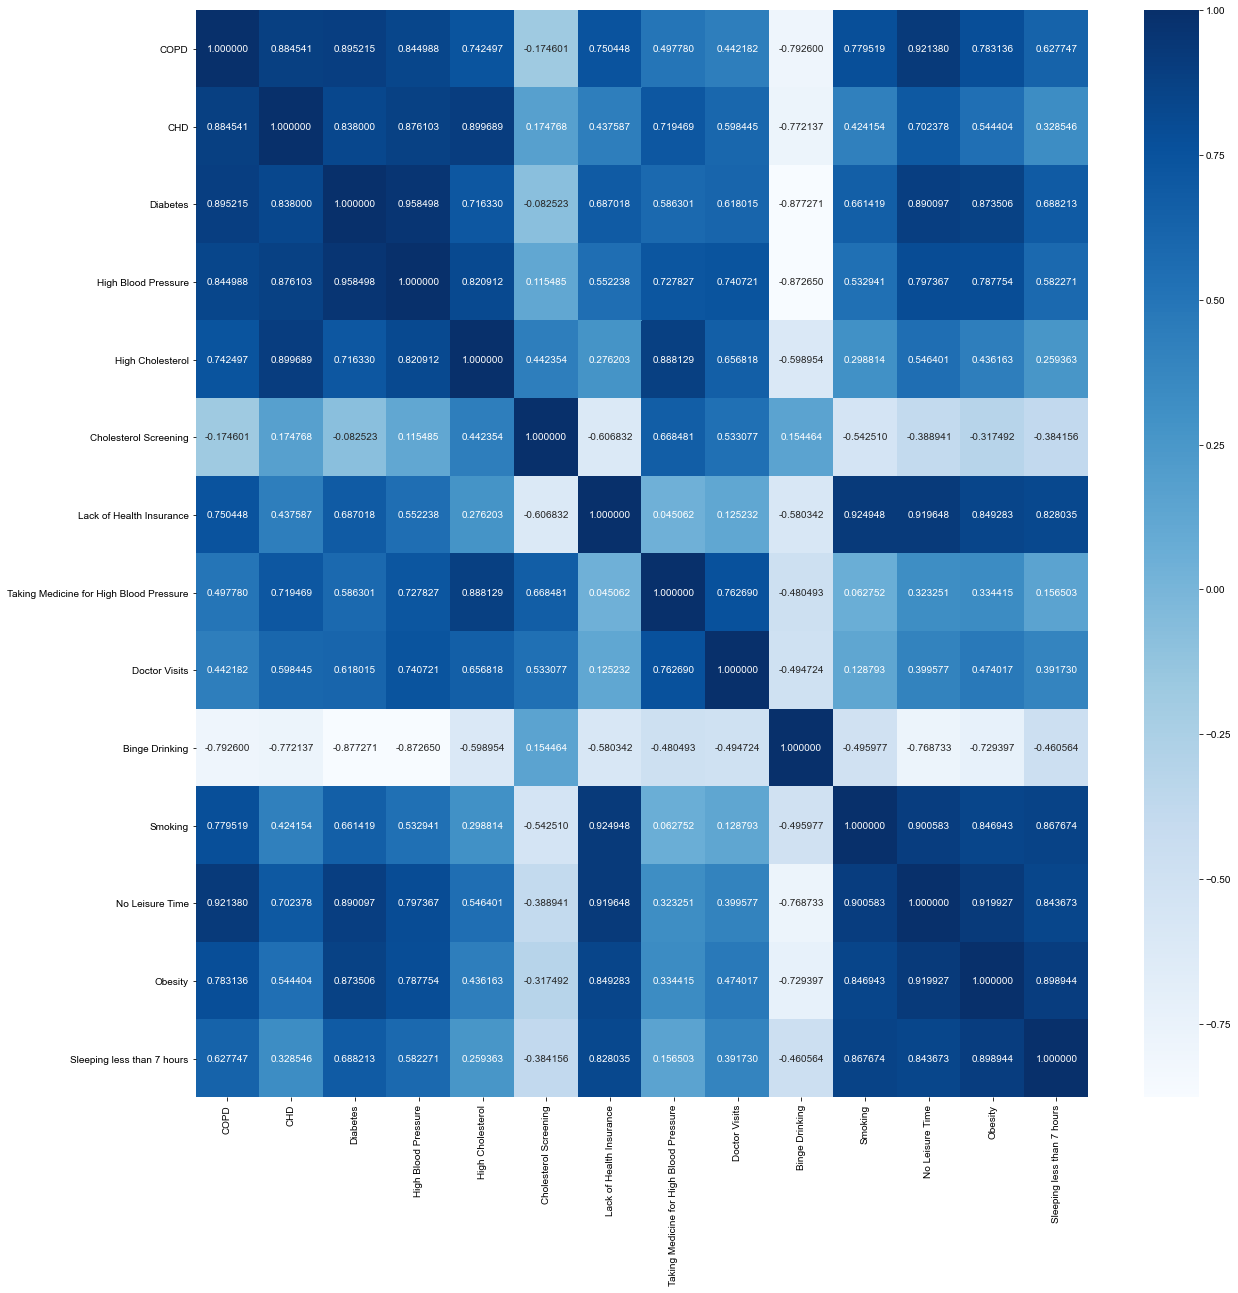

In [178]:
corr_matrix = df11[['COPD','CHD', 'Diabetes', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Screening', 'Lack of Health Insurance', 'Taking Medicine for High Blood Pressure','Doctor Visits','Binge Drinking','Smoking','No Leisure Time','Obesity','Sleeping less than 7 hours']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='f', cmap='Blues');